In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
import tqdm.notebook as tq
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [3]:
# numerical - density graphs
def plotting_kd(data,columns,hue=None):
    if hue==None:    
        plot=sns.FacetGrid(data,size=10).map(sns.distplot,columns)
    else:
        plot=sns.FacetGrid(data,hue=hue,size=10).map(sns.distplot,columns)
        plt.pyplot.legend()

In [4]:
# categorical - countplots
def countplot_columns(df, columns):
    figure(figsize=(15,10))
    plot=sns.countplot(x=columns,data=df)
    total=len(df['y'])
    
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

In [5]:
# categorical - countplots bivariate
def countplot_target_varaible(df,columns,classes):
    figure(figsize=(15,10))
    total=len(df[classes])
    plot=sns.countplot(x=columns,data=df,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

### DATA UNDERSTANDING AND CLEANING

The data has been collected from the UCI Machine Learning Repository and is tied to a bank marketing effort for a Portuguese bank. The dataset has 4521 records and 17 variables. The variables are a mix of categorical and numerical variables and there are no missing values in the dataset (The label 'Unknown' has been used to code missing values) 

In [6]:
df=pd.read_excel("C:/Users/TANVI/Desktop/Tanvi backup/D3/Tanvi/Data/clean_data.xlsx")

In [7]:
df2=df.copy(deep=True)

In [8]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0


In [9]:
df2.shape

(4521, 18)

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
Target       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
 17  Target     4521 non-null   int64 
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,Target
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


### Distribution of Target Variable

The target variable 'y' indicates whether the consumer has signed up for a term deposit and is hence a binary answer variable (Yes or No)
The variable has been encoded into 0's and 1's.

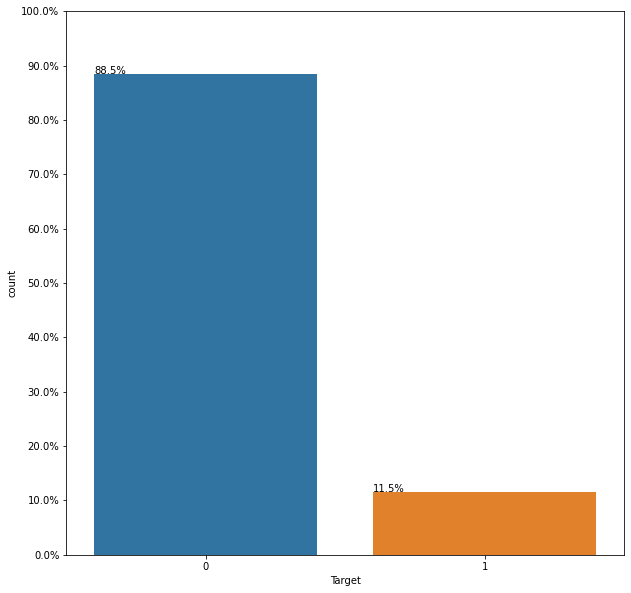

In [13]:
figure(figsize=(10,10))
total=len(df['Target'])
plot=sns.countplot(x=df['Target'],data=df)
#plot.patches gives x,y coordinate,height width and angle and using this i have converted the labels into the perctage
#to make it interpretable.
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.show()

In [14]:
df2['y'] = df2['y'].astype('category')

### EXPLORATORY DATA ANALYSIS

### NUMERICAL DATA

In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,Target
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


### AGE

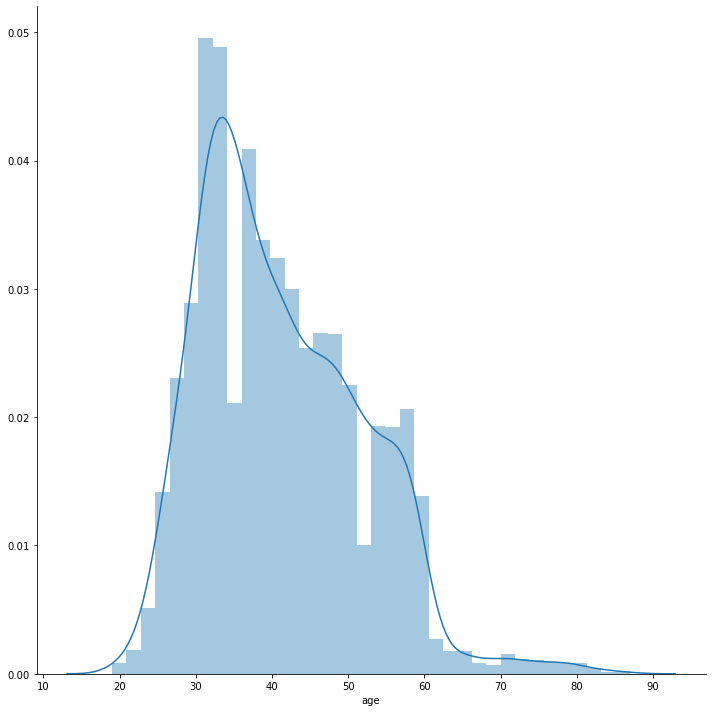

In [17]:
plotting_kd(df,'age')

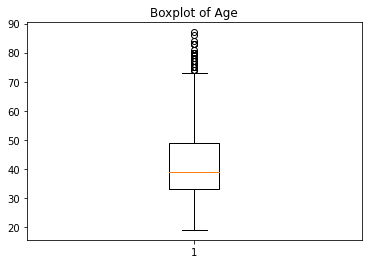

In [18]:
fig = plt.figure()
#fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['age'])
plt.title('Boxplot of Age')
# show plot
plt.show()

Customers are between 19 and 87 years of age with a mean of 41 years and a median of 39 years. The inter quartile range is between 33 and 49 years. 

In [19]:
# BINNING AGE 

In [20]:
df2["Binned_age"]=""
df2["Binned_age"]=np.where((df2["age"]<=29),"1",np.where(df2["age"]<=56,"2",np.where(df2["age"]>56,"3","Error")))

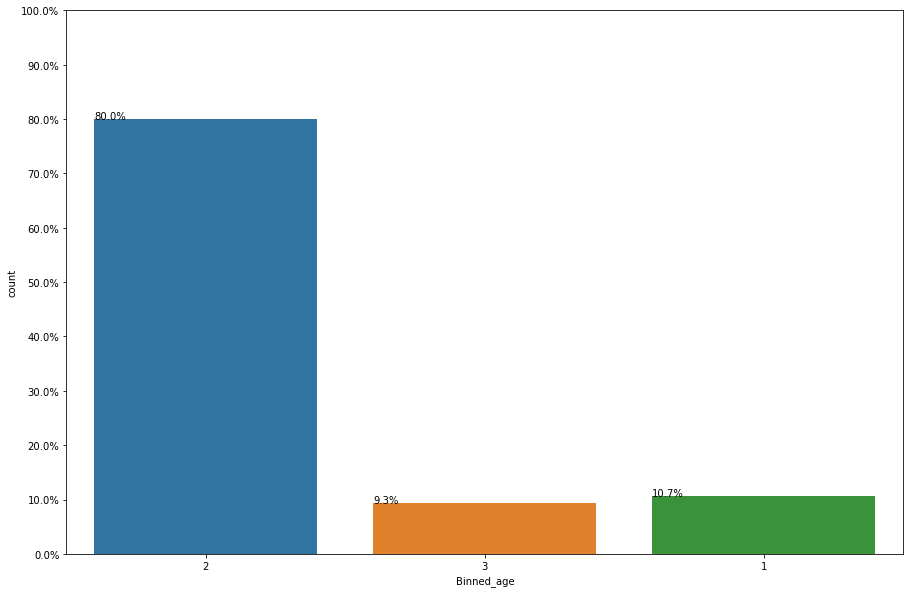

In [21]:
countplot_columns(df2,"Binned_age")

Here it can be clearly seen that target of the bank were people from late twenties to late fifties. 80% of the clients who were contacted were from the age group (27,56]

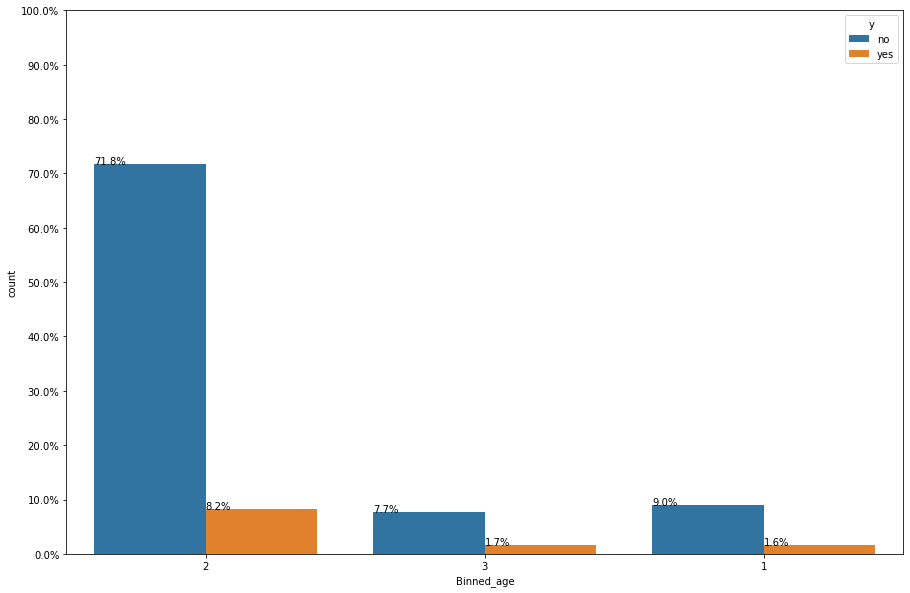

In [23]:
countplot_target_varaible(df2,"Binned_age","y")

It can be clearly seen that target of the bank were people from late twenties to late fifties. Although the number of people who said yes are high in this region, the number of people who said no is also high. 17.8% of the customers over 56 years subscribed to the term deposit which is greater than any other age group.

In [166]:
df2['Binned_age'] = df2['Binned_age'].astype('category')

### BALANCE

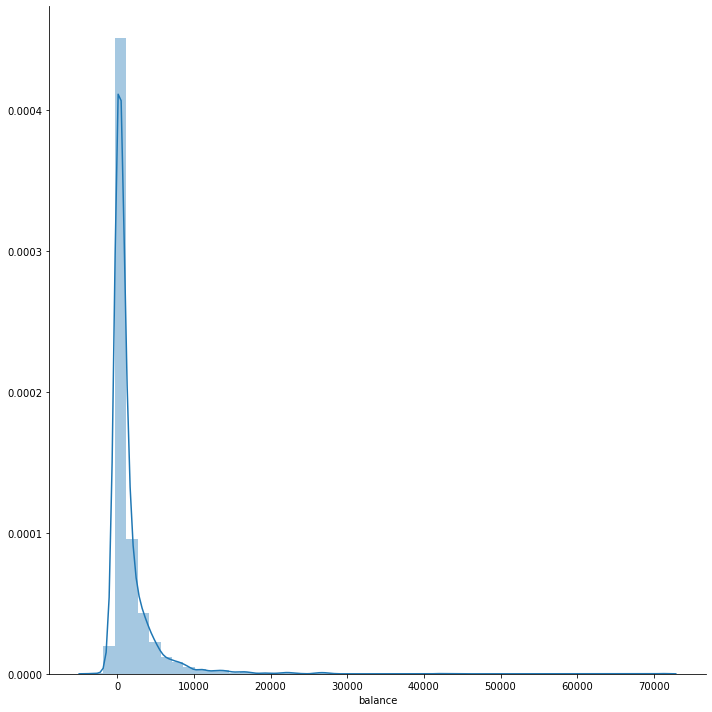

In [167]:
plotting_kd(df,'balance')

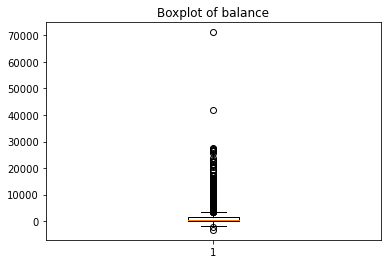

In [168]:
fig = plt.figure()
 
# Creating plot
plt.boxplot(df['balance'])
plt.title('Boxplot of balance')
# show plot
plt.show()

In [169]:
def bin_balance(row):
    if row["balance"] <=444:
        return "1"
    elif row["balance"] >444 and row["balance"] <=1957:
        return "2"
    elif row["balance"] >1957 and row["balance"] <=3913:
        return "3"
    elif row["balance"] >3913:
        return "4"
    else:
        return "Error"

In [170]:
df2['Binned_balance'] = df.apply(lambda row: bin_balance(row), axis=1)

In [171]:
df2['Binned_balance'] = df2['Binned_balance'].astype('category')

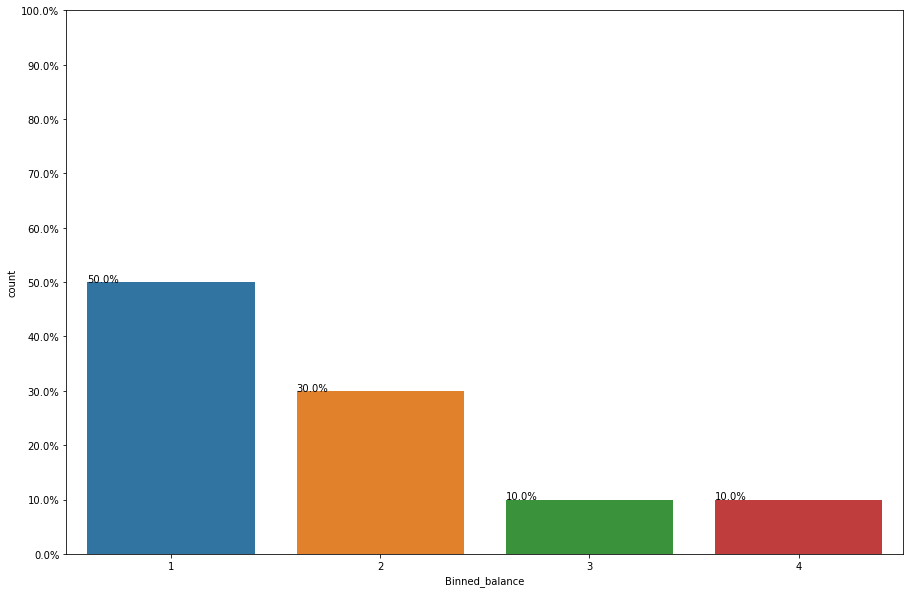

In [172]:
countplot_columns(df2,"Binned_balance")

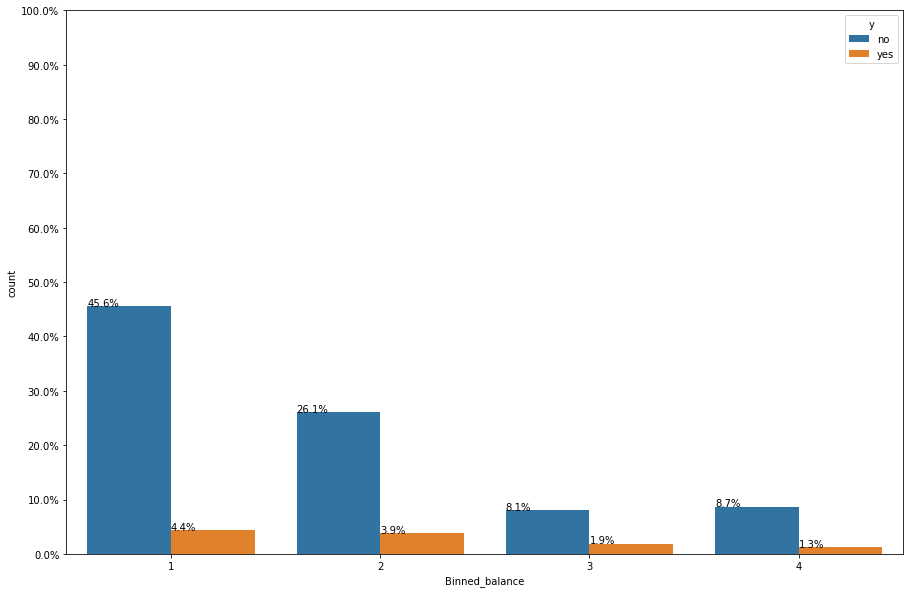

In [173]:
countplot_target_varaible(df2,"Binned_balance","y")

### DAY

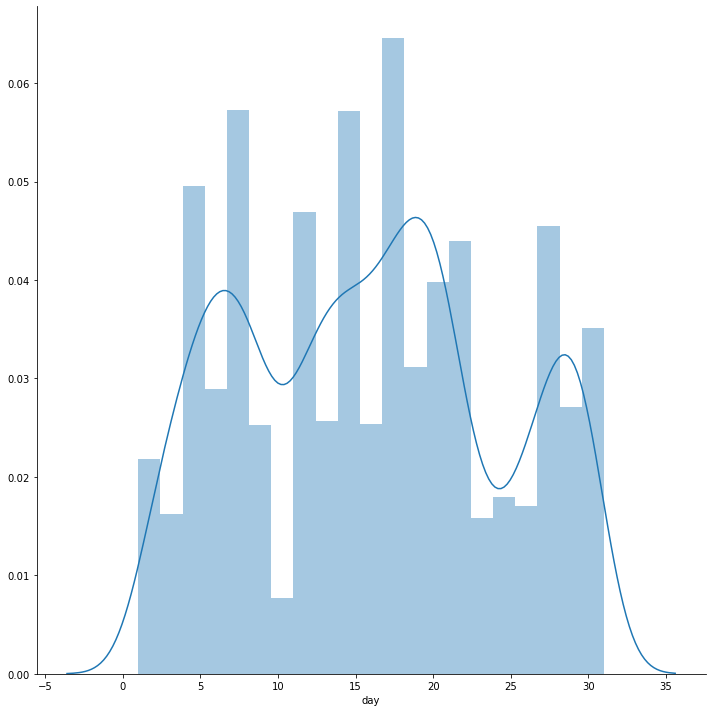

In [174]:
plotting_kd(df,'day')

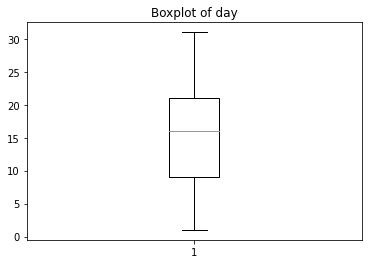

In [175]:
fig = plt.figure()
 
# Creating plot
plt.boxplot(df['day'])
plt.title('Boxplot of day')
# show plot
plt.show()

In [176]:
def bin_day(row):
    if row["day"] in [29,20,31,7,6,8,19,17,28,14,9,4]:
        return "1"
    elif row["day"] in [23, 26,3,21, 2, 25, 11, 15, 13, 27, 16, 5, 18 ,30, 12, 22]:
        return "2"
    elif row["day"] in [24,10,1]:
        return "3"
    else:
        return "Error"

In [177]:
df2['Binned_day'] = df.apply(lambda row: bin_day(row), axis=1)

In [178]:
df2['Binned_day'] = df2['Binned_day'].astype('category')

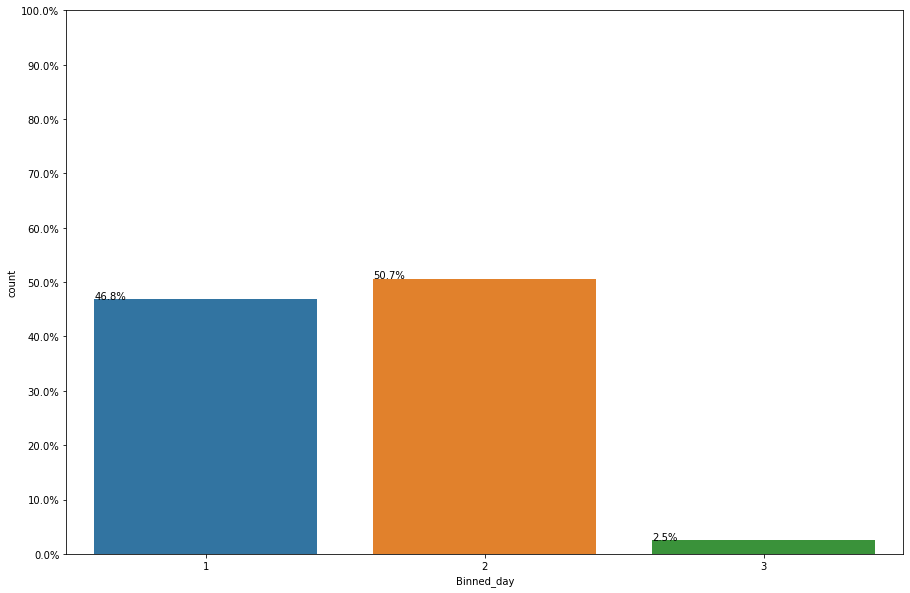

In [179]:
countplot_columns(df2,"Binned_day")

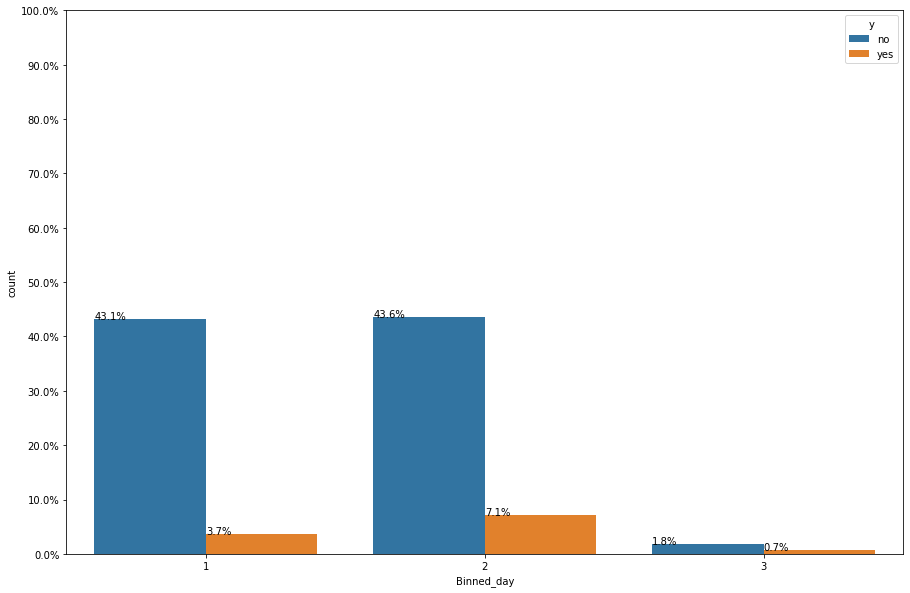

In [180]:
countplot_target_varaible(df2,"Binned_day","y")

### DURATION

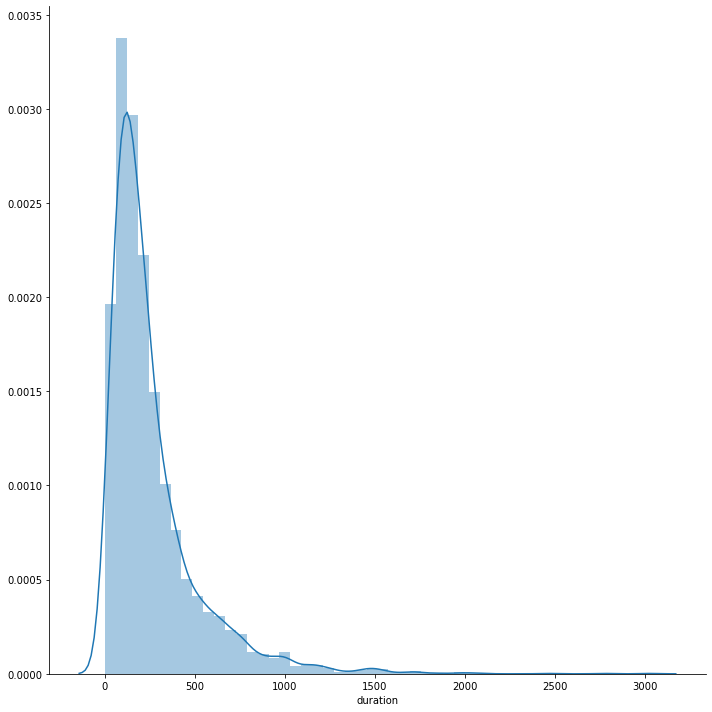

In [181]:
plotting_kd(df,'duration')

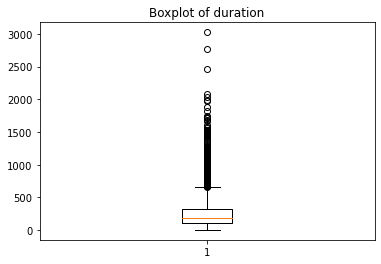

In [182]:
fig = plt.figure()
 
# Creating plot
plt.boxplot(df['duration'])
plt.title('Boxplot of duration')
# show plot
plt.show()

### CAMPAIGN

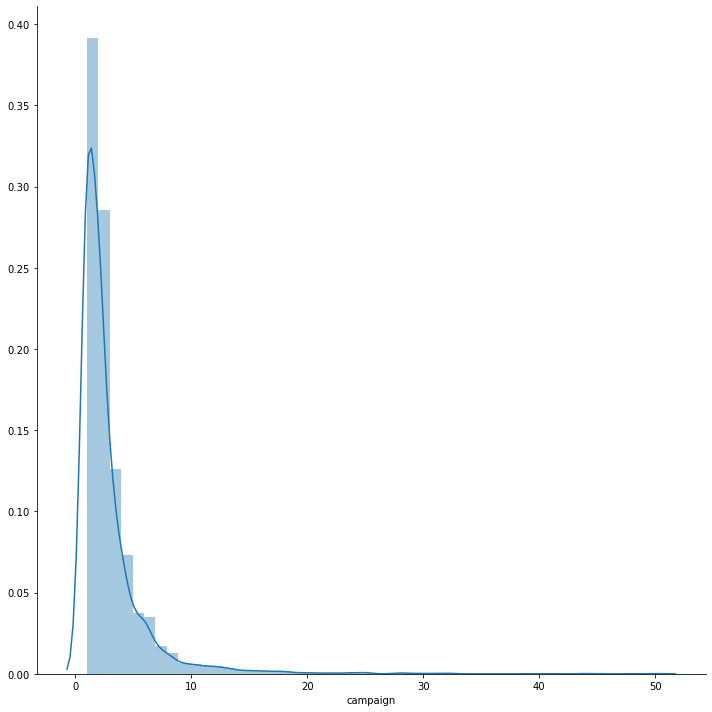

In [183]:
plotting_kd(df,'campaign')

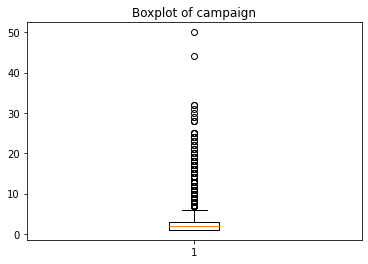

In [184]:
fig = plt.figure()
 
# Creating plot
plt.boxplot(df['campaign'])
plt.title('Boxplot of campaign')
# show plot
plt.show()

In [185]:
def bin_campaign_flag(row):
    if row["campaign"] in [11, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 28, 29, 30, 31, 32, 44, 50]:
        return "1"
    else:
        return "0"

In [186]:
def bin_campaign(row):
    if row["campaign"] in [10, 12, 5, 9, 8, 7, 3, 6]:
        return "1"
    elif row["campaign"] in [2, 13, 4, 1, 17]:
        return "2"
    elif row["campaign"] in [24]:
        return "3"
    else:
        return "Error"

In [187]:
df2['Binned_campaign_flag'] = df.apply(lambda row: bin_campaign_flag(row), axis=1)
df2['Binned_campaign'] = df.apply(lambda row: bin_campaign(row), axis=1)

In [188]:
df2['Binned_campaign_flag'] = df2['Binned_campaign_flag'].astype('category')
df2['Binned_campaign'] = df2['Binned_campaign'].astype('category')

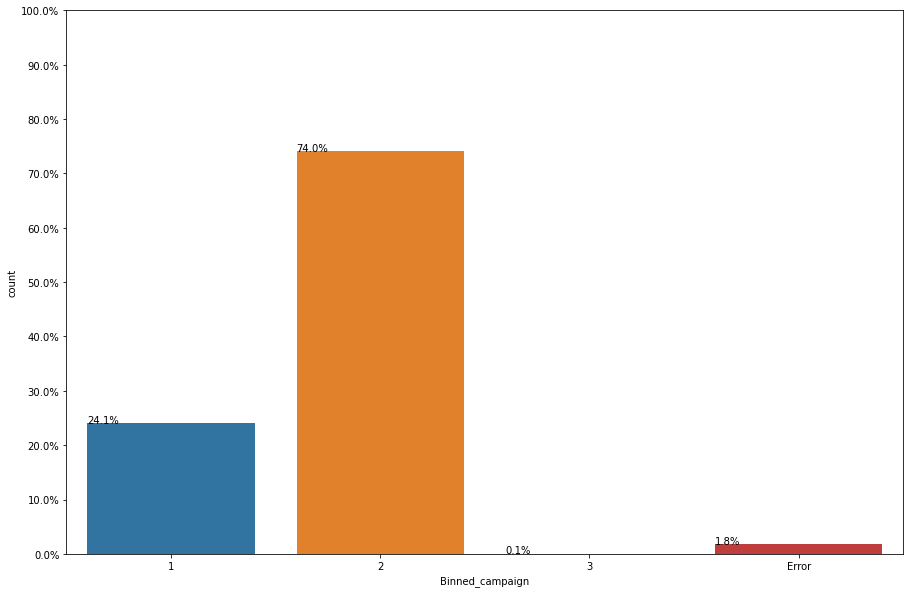

In [189]:
countplot_columns(df2,"Binned_campaign")

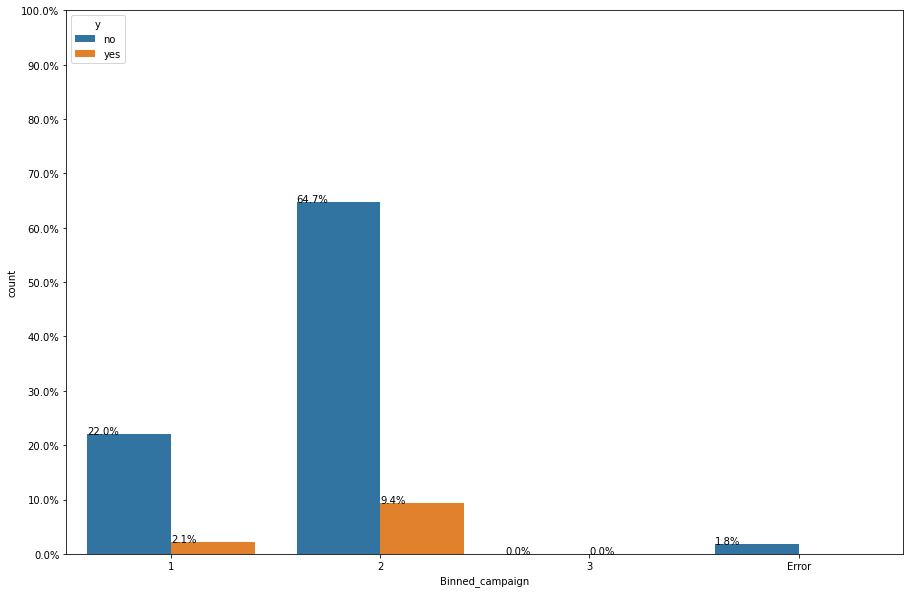

In [190]:
countplot_target_varaible(df2,"Binned_campaign","y")

### PDAYS

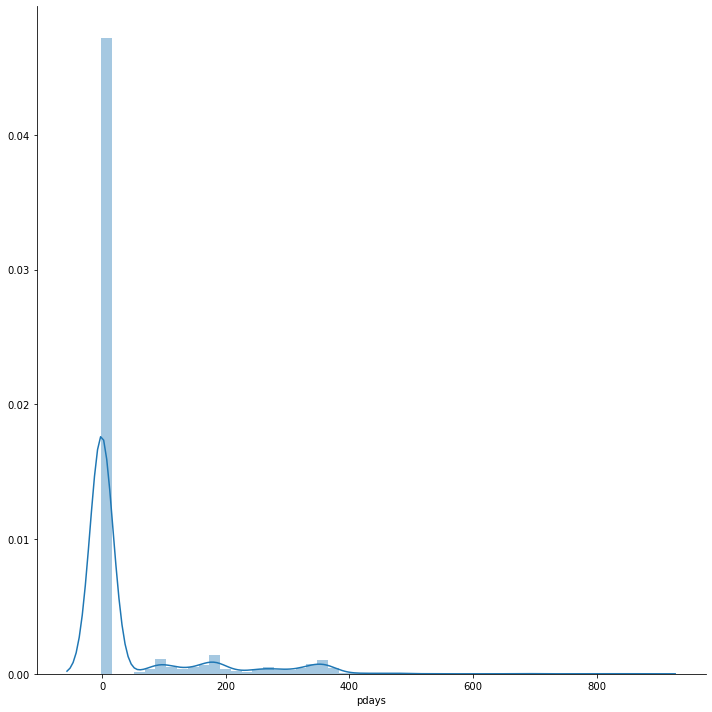

In [191]:
plotting_kd(df,'pdays')

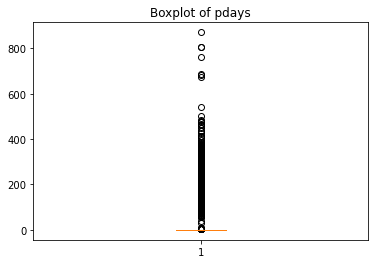

In [192]:
fig = plt.figure()
 
# Creating plot
plt.boxplot(df['pdays'])
plt.title('Boxplot of pdays')
# show plot
plt.show()

In [193]:
def bin_pdays(row):
    if row["pdays"] <=-1:
        return "1"
    elif row["pdays"] >-1 and row["pdays"] <=182:
        return "2"
    elif row["pdays"] >182:
        return "3"
    else:
        return "Error"

In [194]:
df2['Binned_pdays'] = df.apply(lambda row: bin_pdays(row), axis=1)

In [195]:
df2['Binned_pdays'] = df2['Binned_pdays'].astype('category')

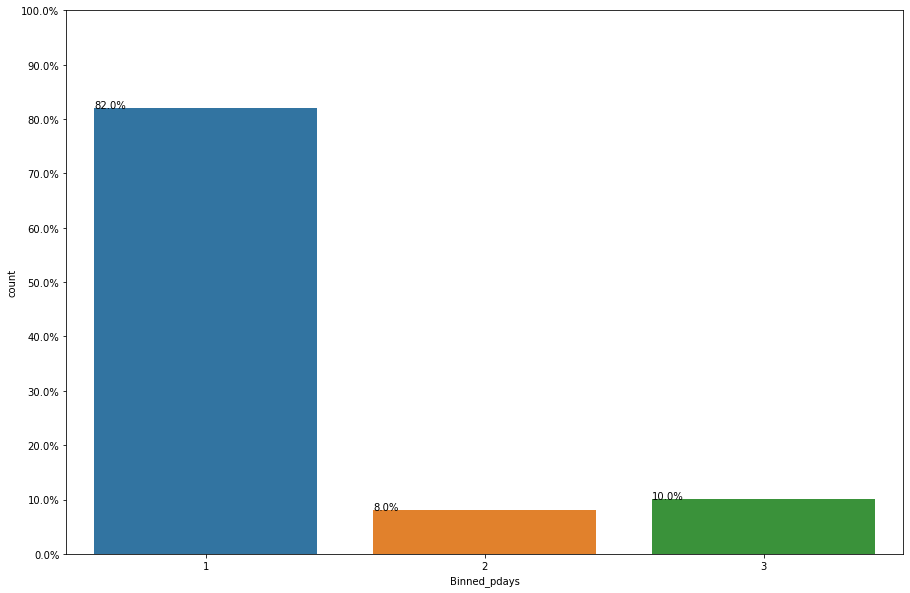

In [196]:
countplot_columns(df2,"Binned_pdays")

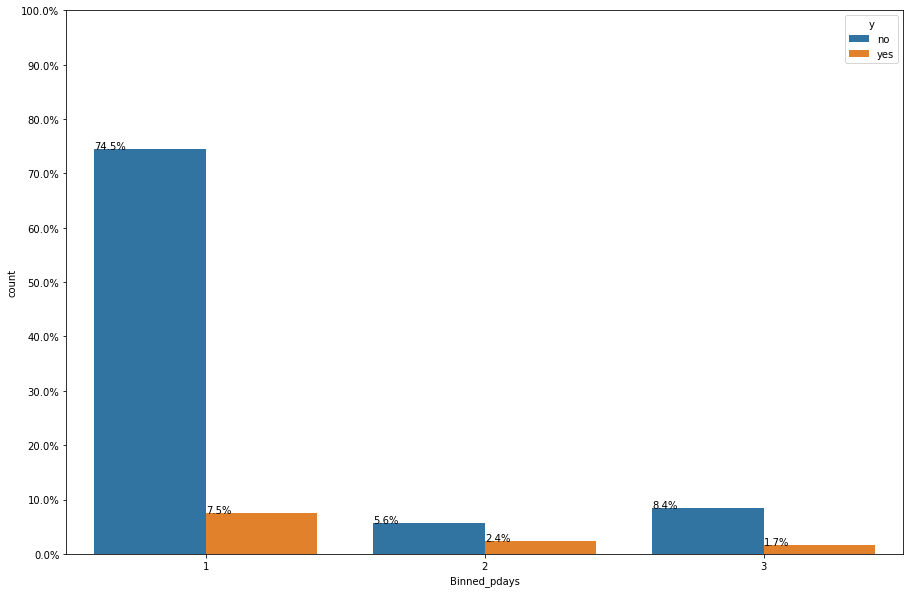

In [197]:
countplot_target_varaible(df2,"Binned_pdays","y")

### PREVIOUS

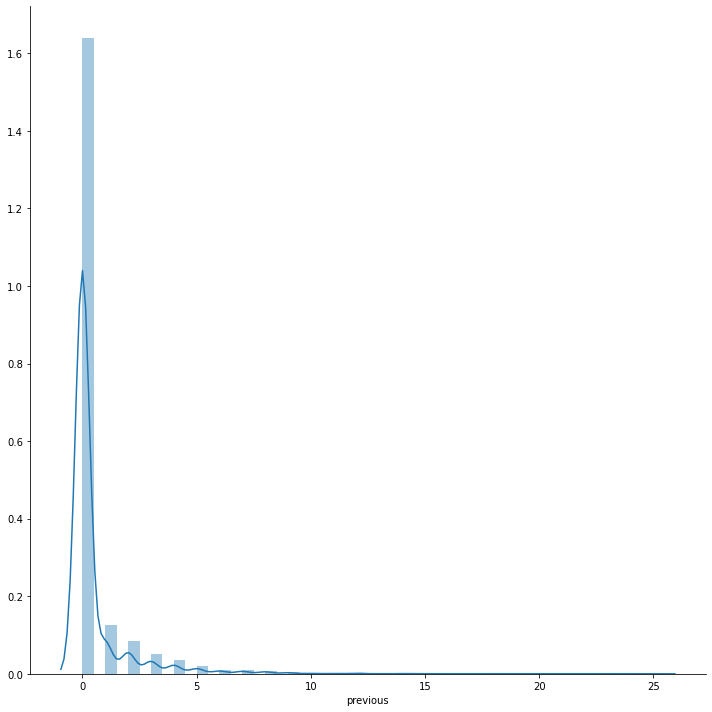

In [198]:
plotting_kd(df,'previous')

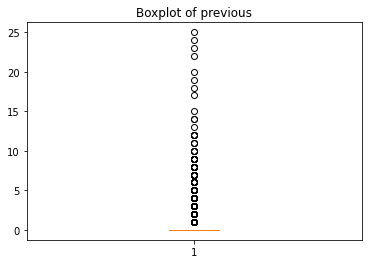

In [199]:
fig = plt.figure()
 
# Creating plot
plt.boxplot(df['previous'])
plt.title('Boxplot of previous')
# show plot
plt.show()

In [200]:
def bin_previous(row):
    if row["previous"] <=-0:
        return "1"
    elif row["previous"] >0 and row["previous"] <=1:
        return "2"
    elif row["previous"] >1:
        return "3"
    else:
        return "Error"

In [201]:
df2['Binned_previous'] = df.apply(lambda row: bin_previous(row), axis=1)

In [202]:
df2['Binned_previous'] = df2['Binned_previous'].astype('category')

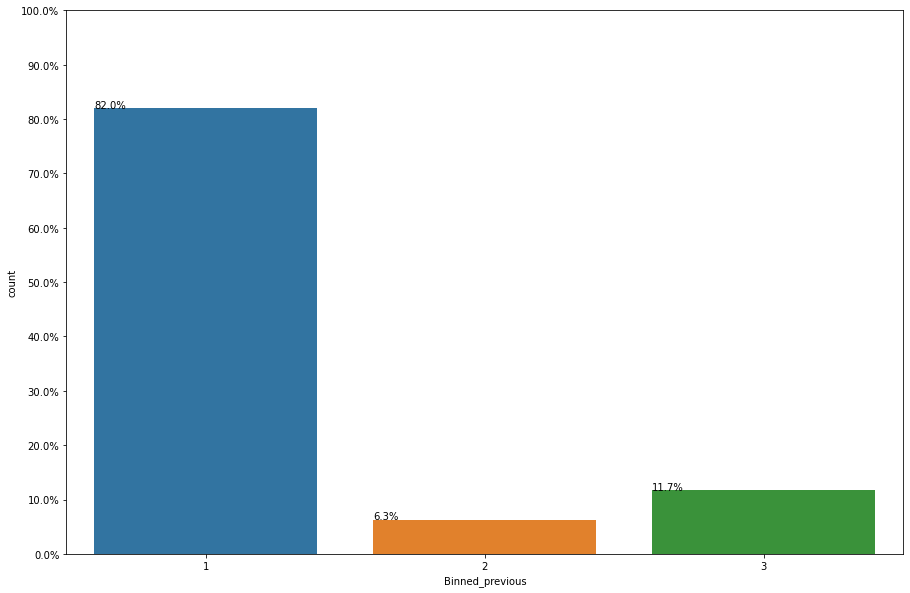

In [203]:
countplot_columns(df2,"Binned_previous")

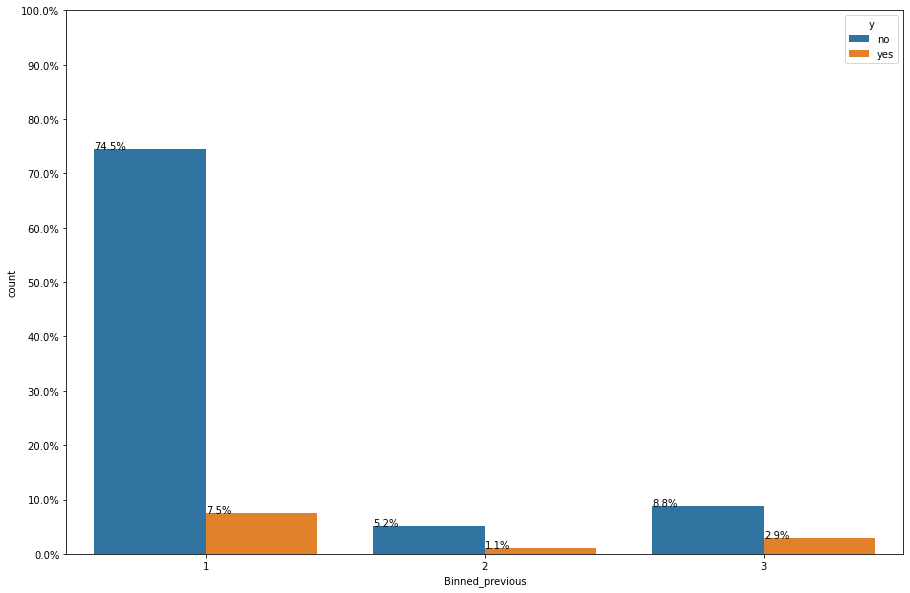

In [204]:
countplot_target_varaible(df2,"Binned_previous","y")

### TARGET

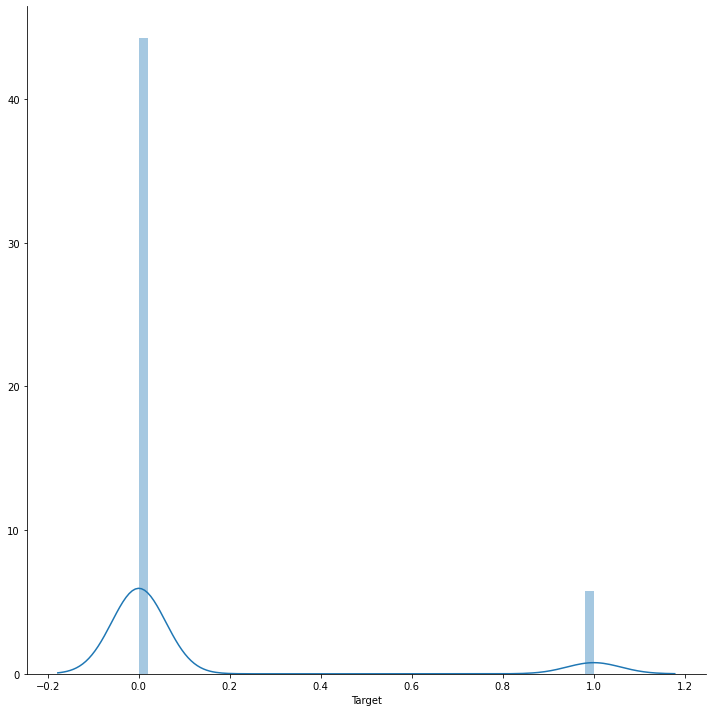

In [205]:
plotting_kd(df,'Target')

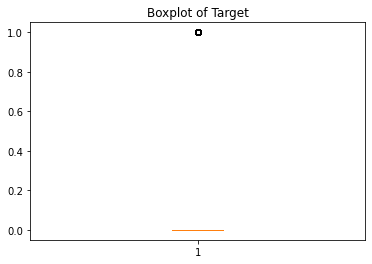

In [206]:
fig = plt.figure()
 
# Creating plot
plt.boxplot(df['Target'])
plt.title('Boxplot of Target')
# show plot
plt.show()

In [207]:
#binned_age=pd.cut(df['age'],10)
#binned_age.value_counts()

In [208]:
corrMatrix = df.corr()
print (corrMatrix)

               age   balance       day  duration  campaign     pdays  \
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894   
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437   
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352   
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380   
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137   
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000   
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562   
Target    0.045092  0.017905 -0.011244  0.401118 -0.061147  0.104087   

          previous    Target  
age      -0.003511  0.045092  
balance   0.026196  0.017905  
day      -0.059114 -0.011244  
duration  0.018080  0.401118  
campaign -0.067833 -0.061147  
pdays     0.577562  0.104087  
previous  1.000000  0.116714  
Target    0.116714  1.000000  


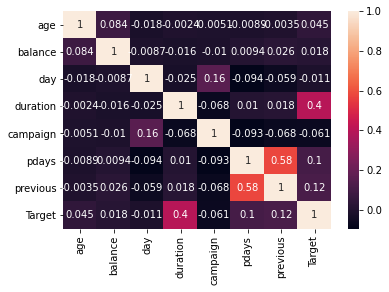

In [209]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

### CATEGORICAL DATA

### 1.  Job

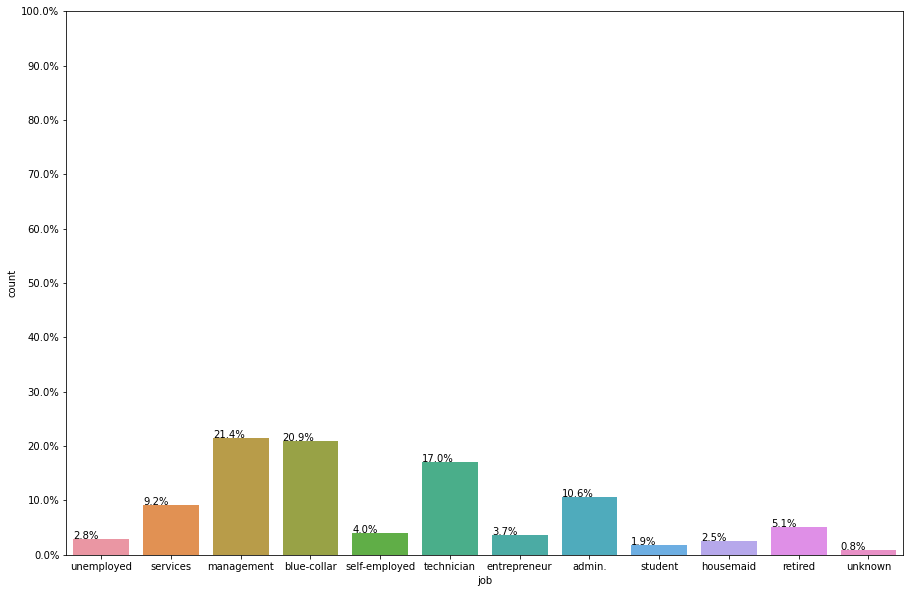

In [210]:
countplot_columns(df2,'job')

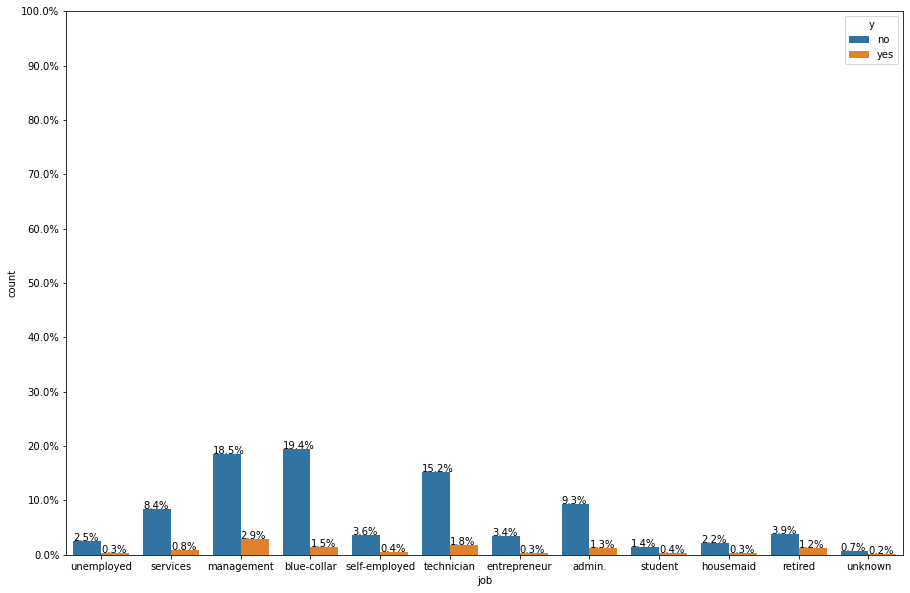

In [211]:
countplot_target_varaible(df2,'job','y')

In [212]:
def bin_job(row):
    if row["job"] not in ["management", "blue-collar", "admin.", "student", "housemaid", "retired", "unknown"]:
        return "1"
    elif row["job"] in ["management", "admin.", "housemaid"]:
        return "2"
    elif row["job"] in ["blue-collar"]:
        return "3"
    elif row["job"] in ["student", "retired", "unknown"]:
        return "4"
    else:
        return "Error"

In [213]:
df2['Binned_job'] = df.apply(lambda row: bin_job(row), axis=1)

In [214]:
df2['Binned_job'] = df2['Binned_job'].astype('category')

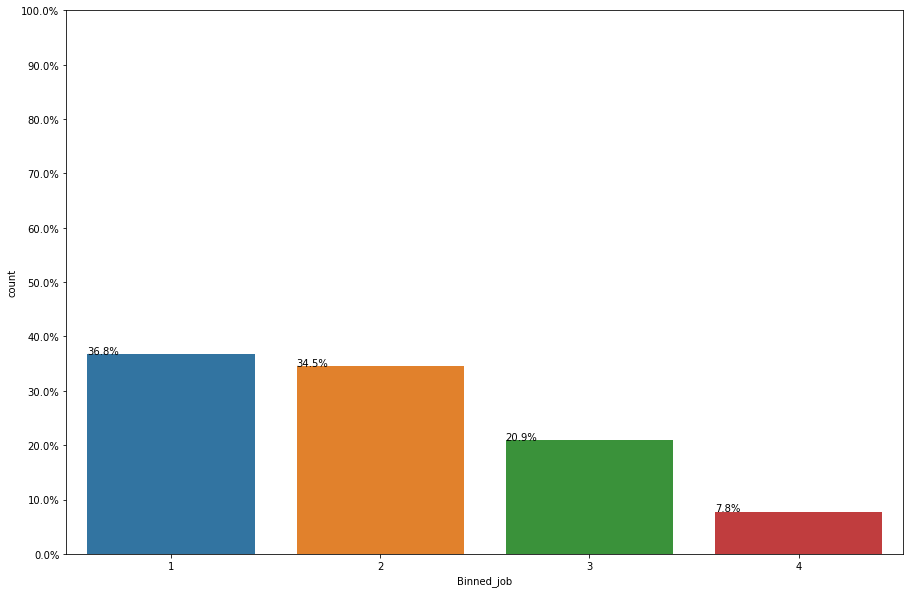

In [215]:
countplot_columns(df2,"Binned_job")

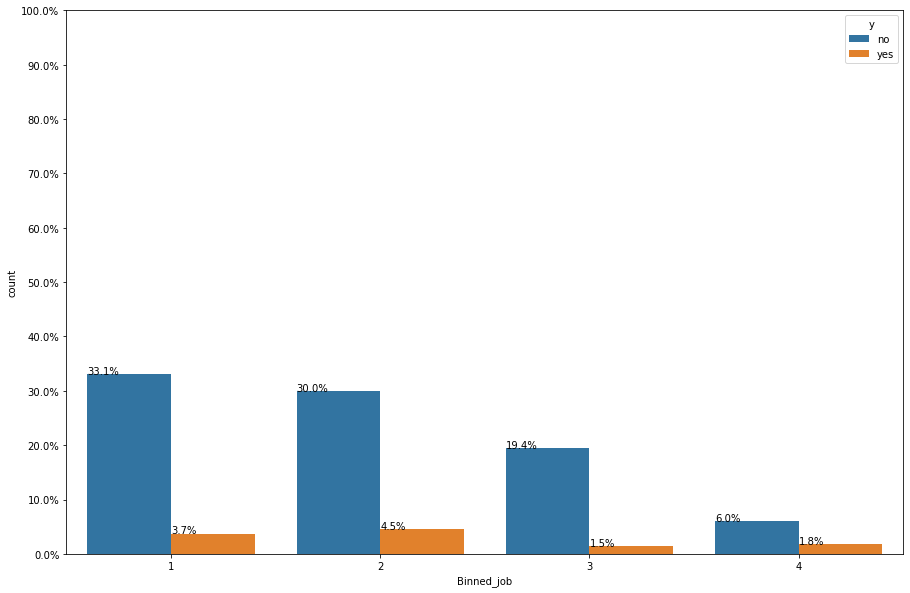

In [216]:
countplot_target_varaible(df2,"Binned_job","y")

### MARITAL STATUS

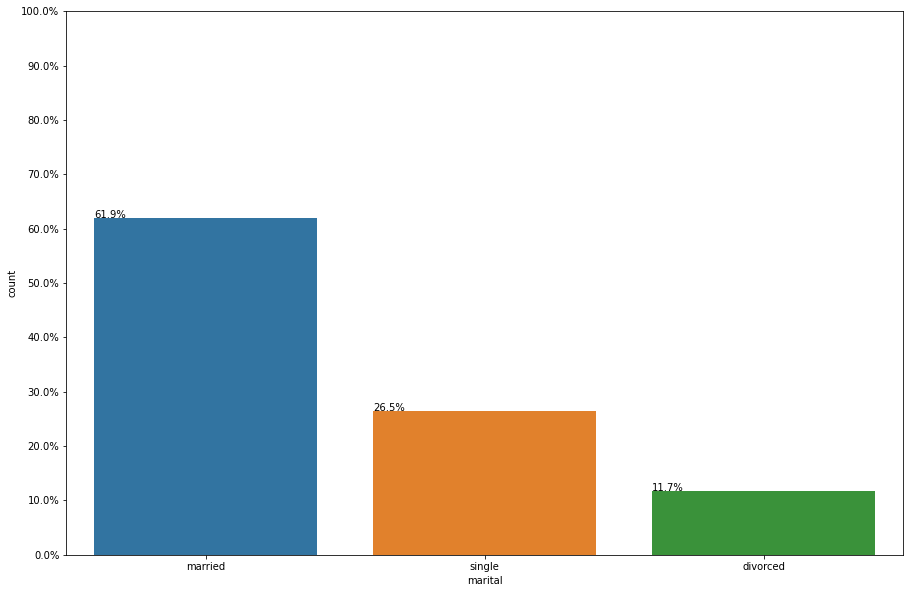

In [217]:
countplot_columns(df2,'marital')

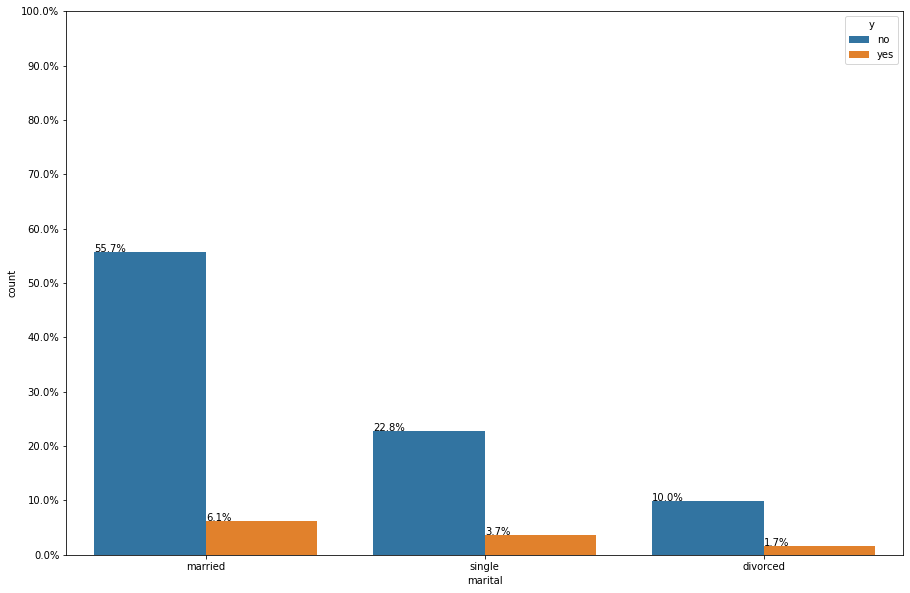

In [218]:
countplot_target_varaible(df2,'marital','y')

In [219]:
def bin_marriage(row):
    if row["marital"] in ["single","divorced"]:
        return "1"
    elif row["marital"] in ["married"]:
        return "2"
    else:
        return "Error"

In [220]:
df2['Binned_marital'] = df.apply(lambda row: bin_marriage(row), axis=1)

In [221]:
df2['Binned_marital'] = df2['Binned_marital'].astype('category')

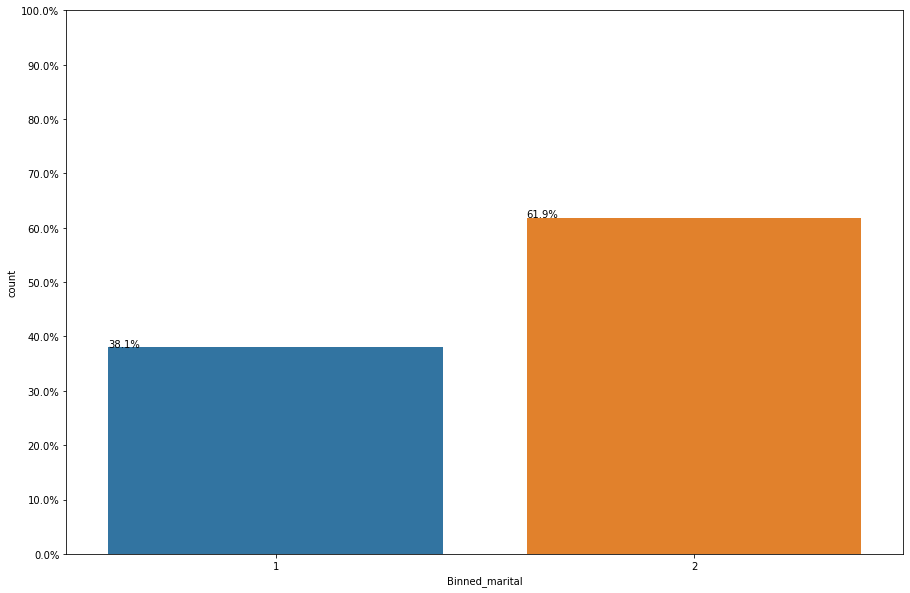

In [222]:
countplot_columns(df2,"Binned_marital")

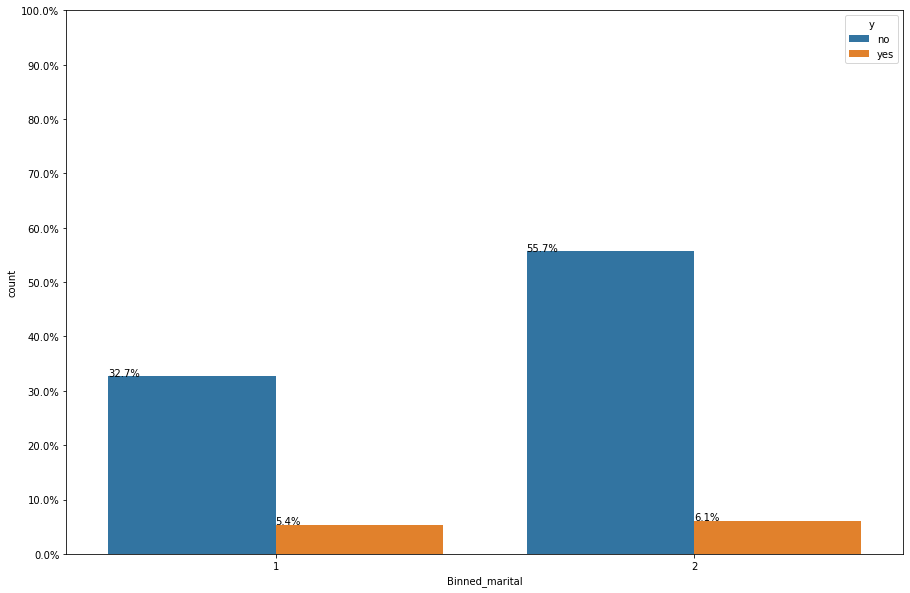

In [223]:
countplot_target_varaible(df2,"Binned_marital","y")

### EDUCATION

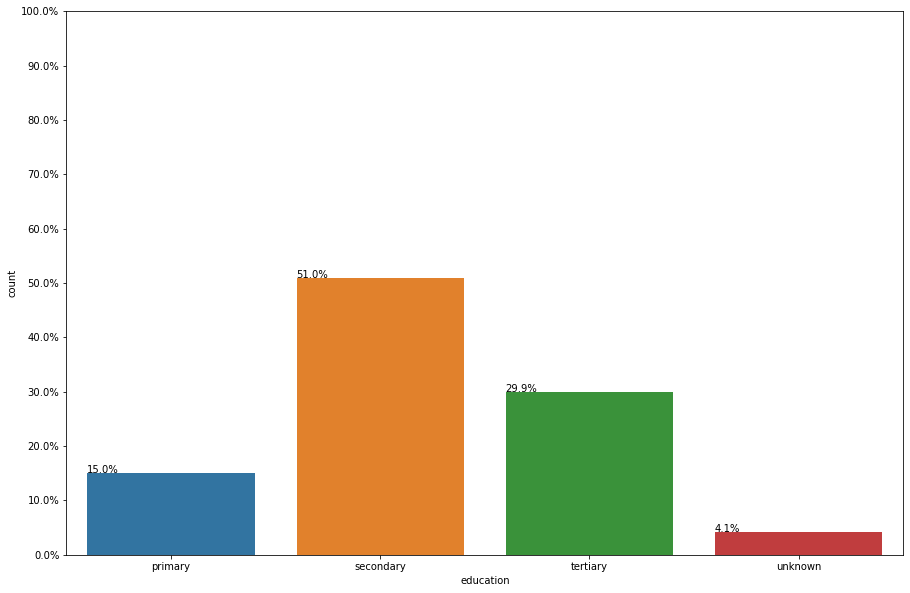

In [224]:
countplot_columns(df2,'education')

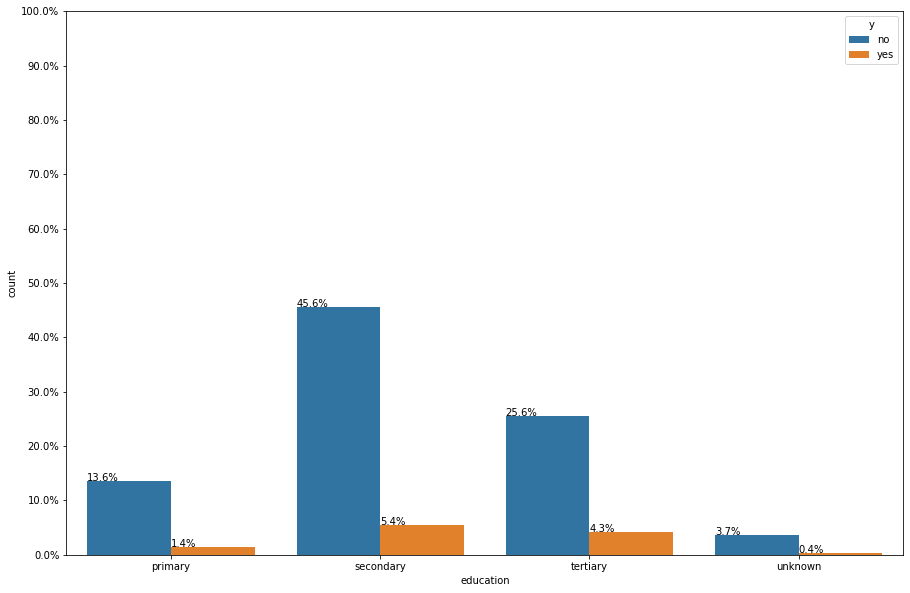

In [225]:
countplot_target_varaible(df2,'education','y')

In [226]:
def bin_education(row):
    if row["education"] not in ["tertiary"]:
        return "2"
    elif row["education"] in ["tertiary"]:
        return "1"
    else:
        return "Error"

In [227]:
df2['Binned_education'] = df.apply(lambda row: bin_education(row), axis=1)

In [228]:
df2['Binned_education'] = df2['Binned_education'].astype('category')

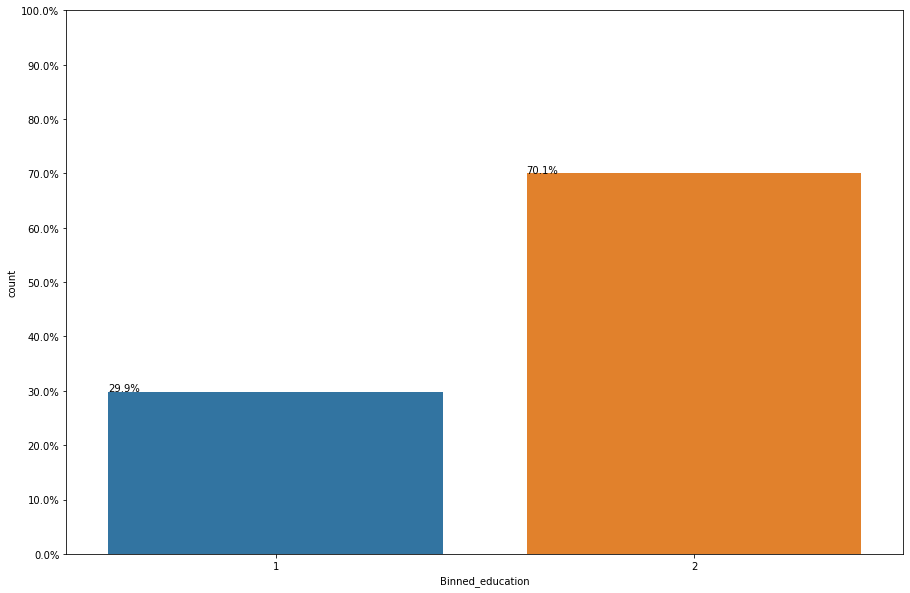

In [229]:
countplot_columns(df2,"Binned_education")

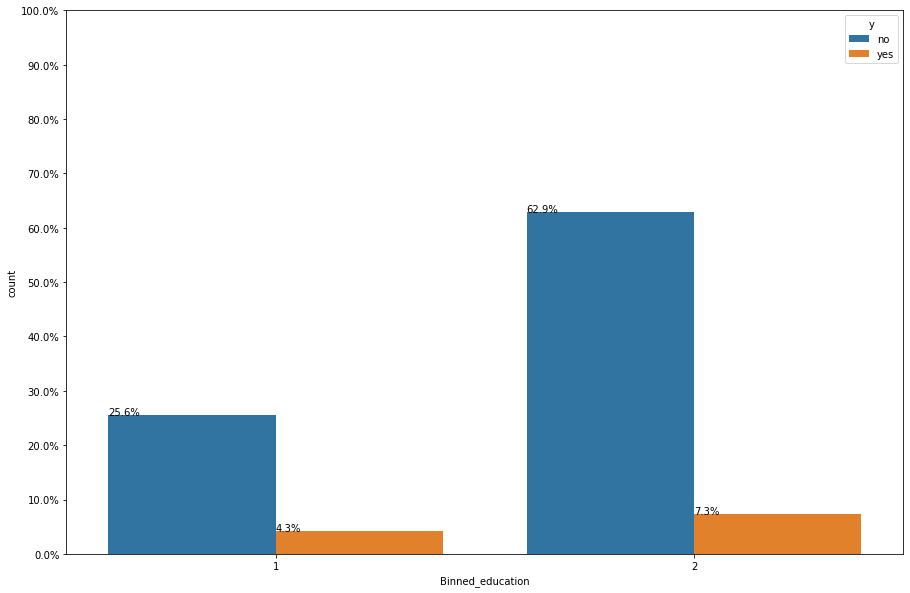

In [230]:
countplot_target_varaible(df2,"Binned_education","y")

### DEFAULT

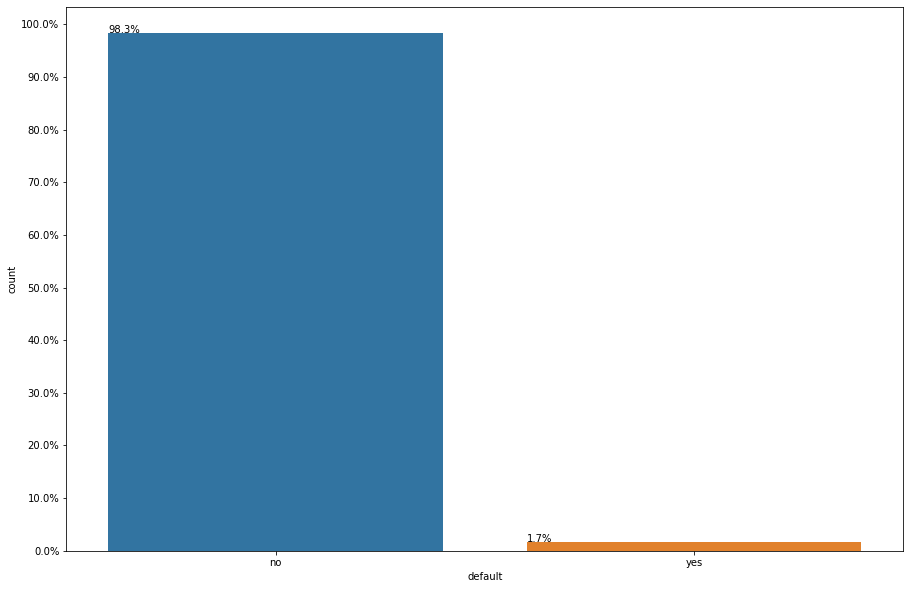

In [231]:
countplot_columns(df2,'default')

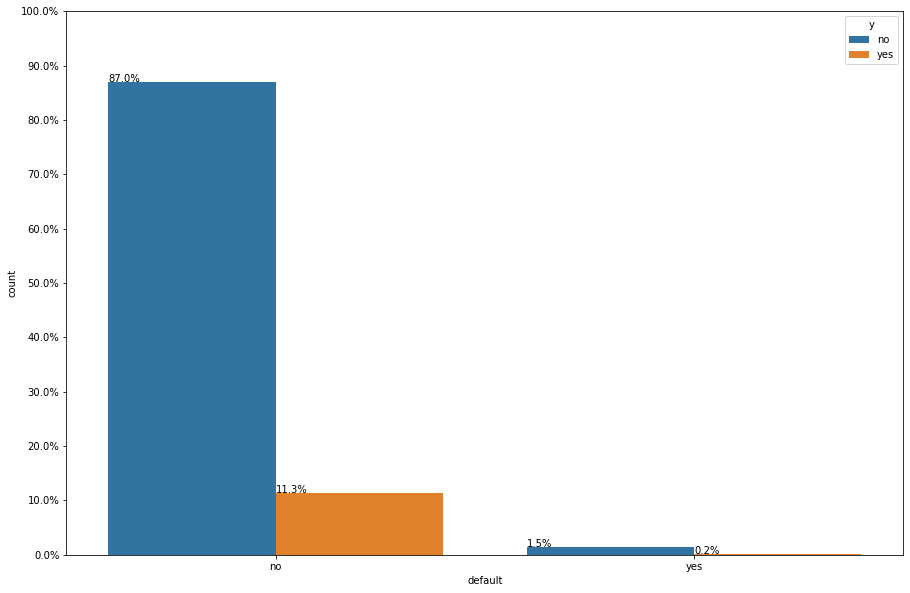

In [232]:
countplot_target_varaible(df2,'default','y')

### HOUSING

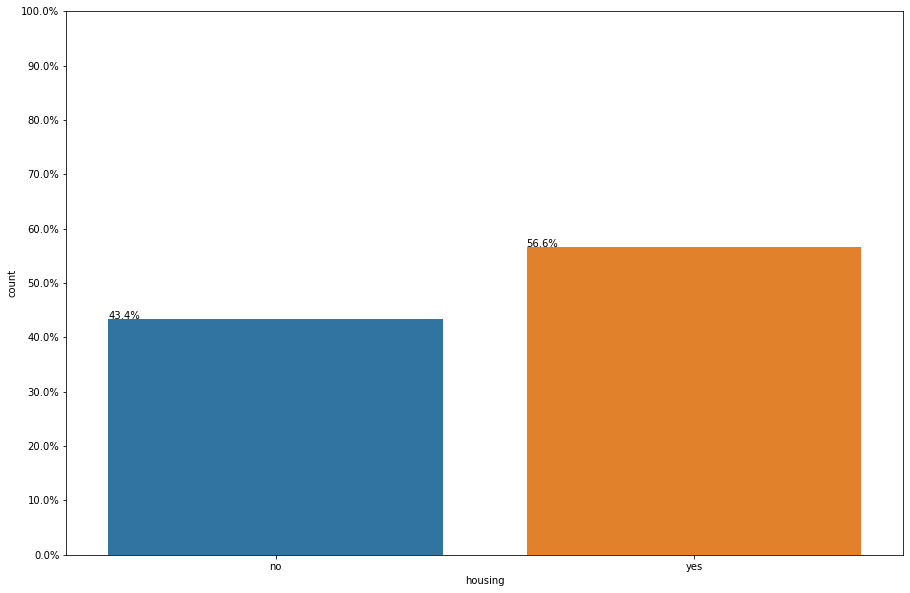

In [233]:
countplot_columns(df2,'housing')

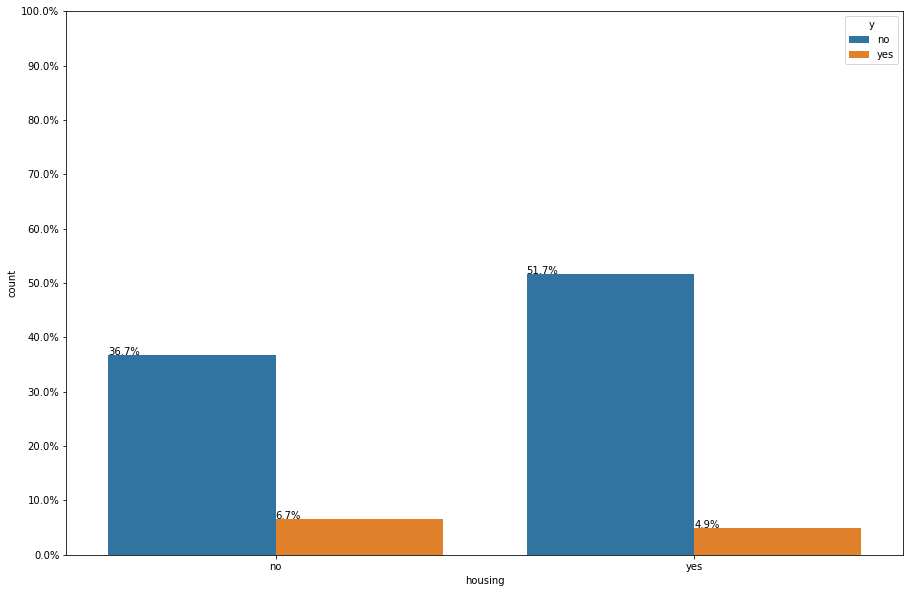

In [234]:
countplot_target_varaible(df2,'housing','y')

In [235]:
def bin_housing(row):
    if row["housing"] in ["no"]:
        return "1"
    elif row["housing"] not in ["no"]:
        return "2"
    else:
        return "Error"

In [236]:
df2['Binned_housing'] = df.apply(lambda row: bin_housing(row), axis=1)

In [237]:
df2['Binned_housing'] = df2['Binned_housing'].astype('category')

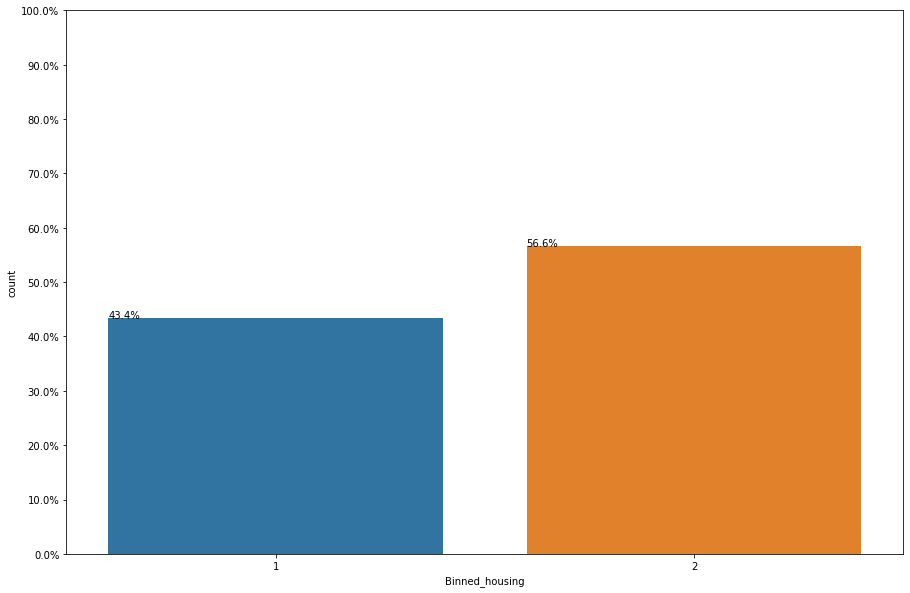

In [238]:
countplot_columns(df2,"Binned_housing")

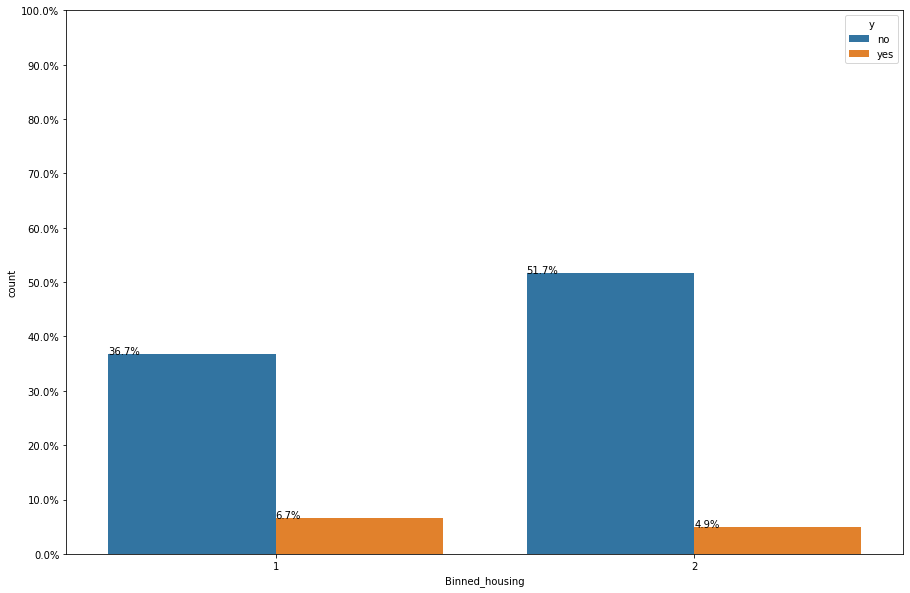

In [239]:
countplot_target_varaible(df2,"Binned_housing","y")

### LOAN

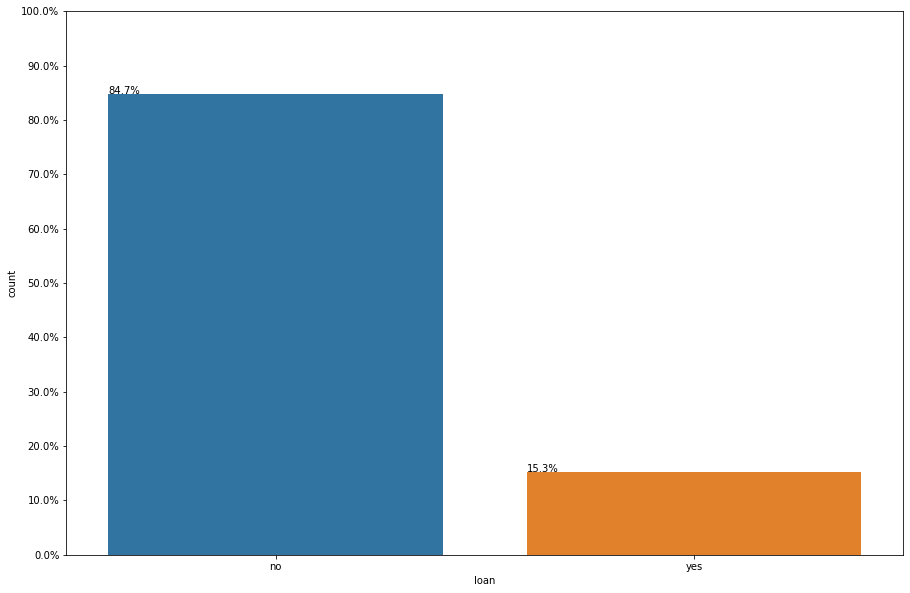

In [240]:
countplot_columns(df2,'loan')

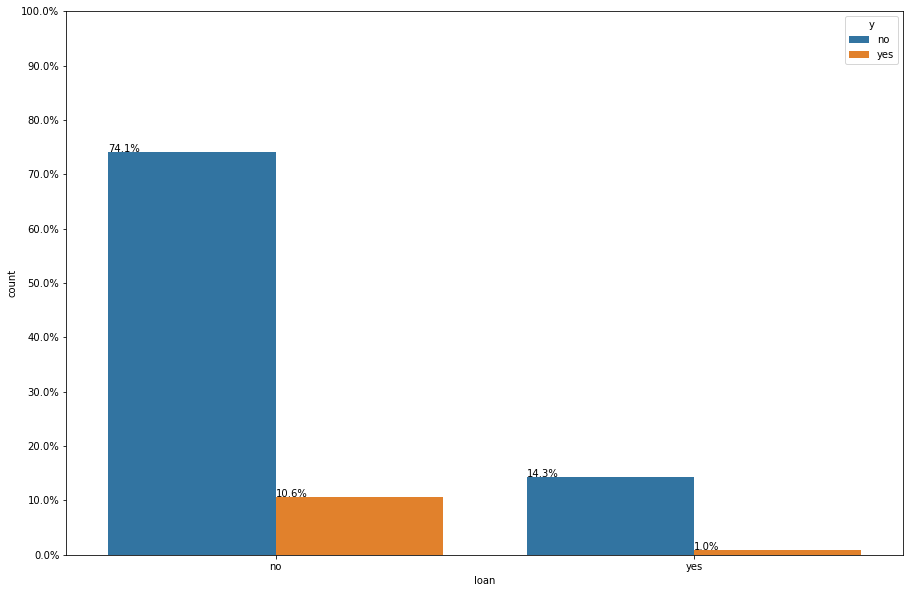

In [241]:
countplot_target_varaible(df2,'loan','y')

In [242]:
def bin_loan(row):
    if row["loan"] in ["no"]:
        return "1"
    elif row["loan"] not in ["no"]:
        return "2"
    else:
        return "Error"

In [243]:
df2['Binned_loan'] = df.apply(lambda row: bin_loan(row), axis=1)

In [244]:
df2['Binned_loan'] = df2['Binned_loan'].astype('category')

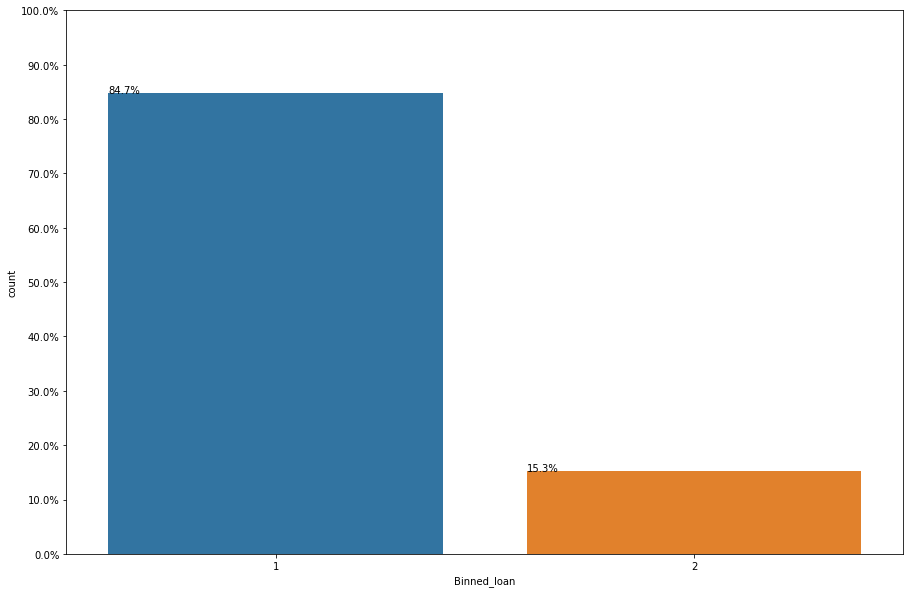

In [245]:
countplot_columns(df2,"Binned_loan")

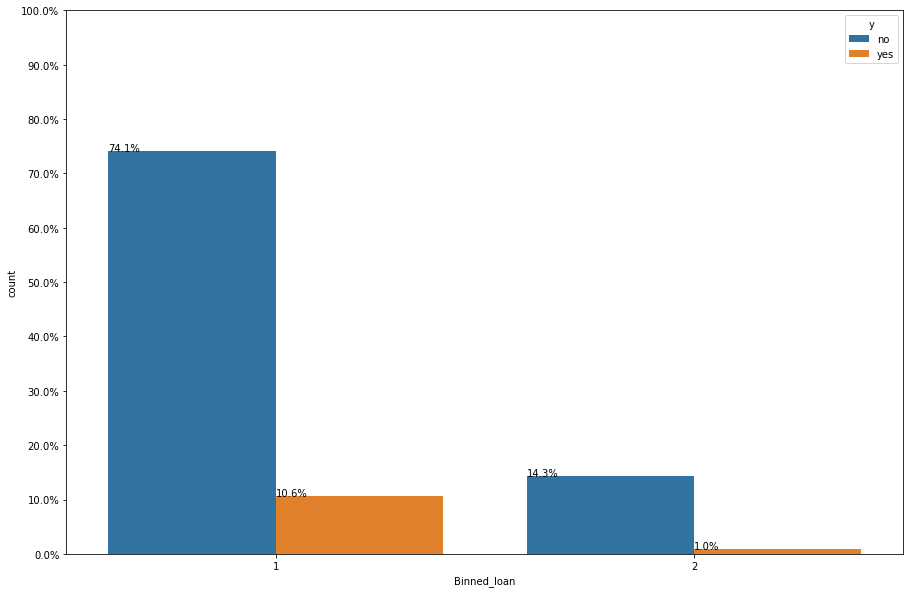

In [246]:
countplot_target_varaible(df2,"Binned_loan","y")

### CONTACT

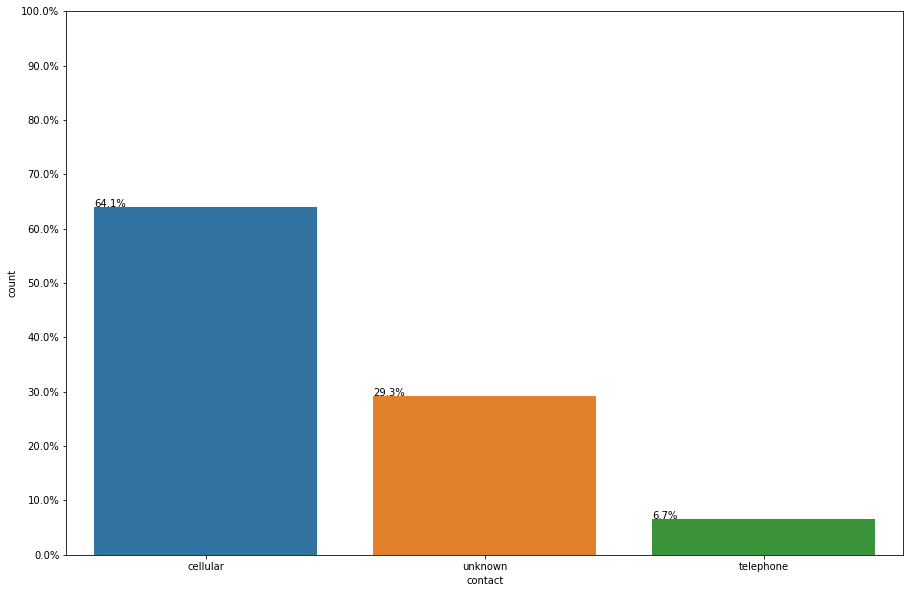

In [247]:
countplot_columns(df2,'contact')

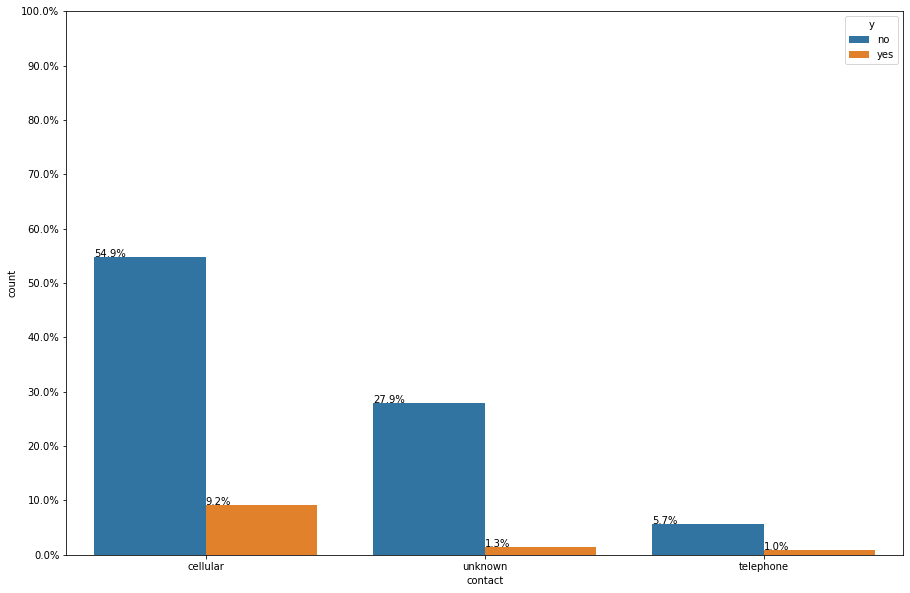

In [248]:
countplot_target_varaible(df2,'contact','y')

In [249]:
def bin_contact(row):
    if row["contact"] in ["unknown"]:
        return "1"
    elif row["housing"] not in ["unknown"]:
        return "2"
    else:
        return "Error"

In [250]:
df2['Binned_contact'] = df.apply(lambda row: bin_contact(row), axis=1)

In [251]:
df2['Binned_contact'] = df2['Binned_contact'].astype('category')

In [252]:
df2['Binned_contact']

0       2
1       2
2       2
3       1
4       1
       ..
4516    2
4517    1
4518    2
4519    2
4520    2
Name: Binned_contact, Length: 4521, dtype: category
Categories (2, object): ['1', '2']

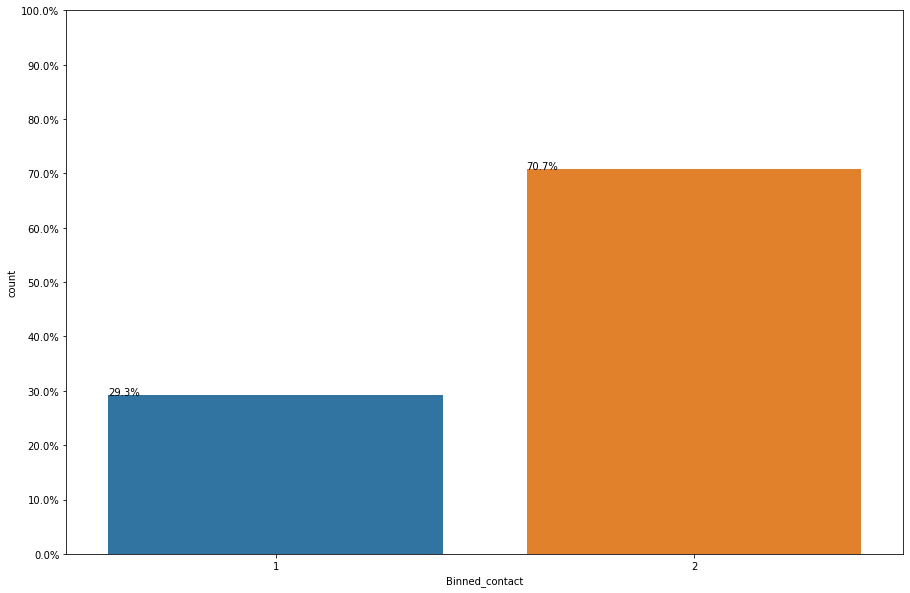

In [253]:
countplot_columns(df2,"Binned_contact")

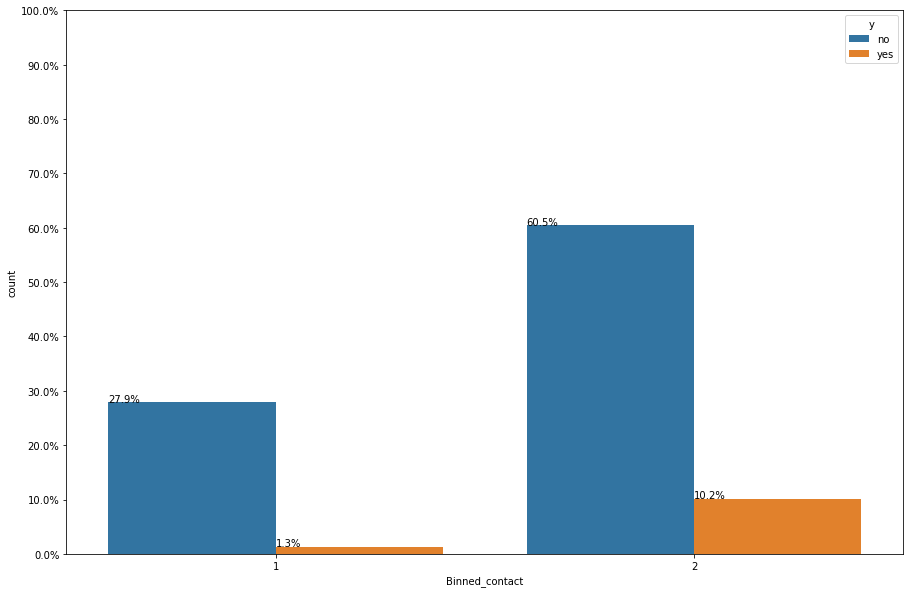

In [254]:
countplot_target_varaible(df2,"Binned_contact","y")

### MONTH

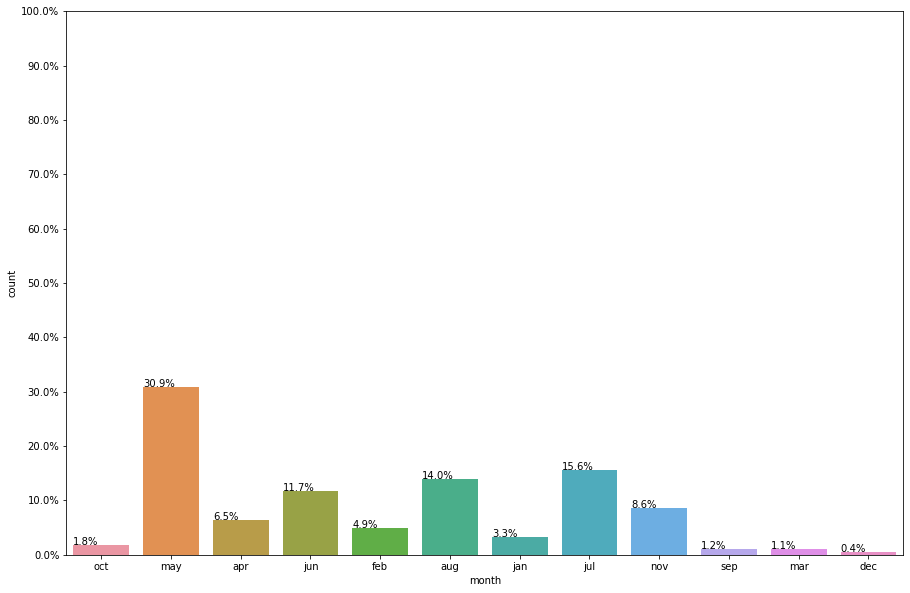

In [255]:
countplot_columns(df2,'month')

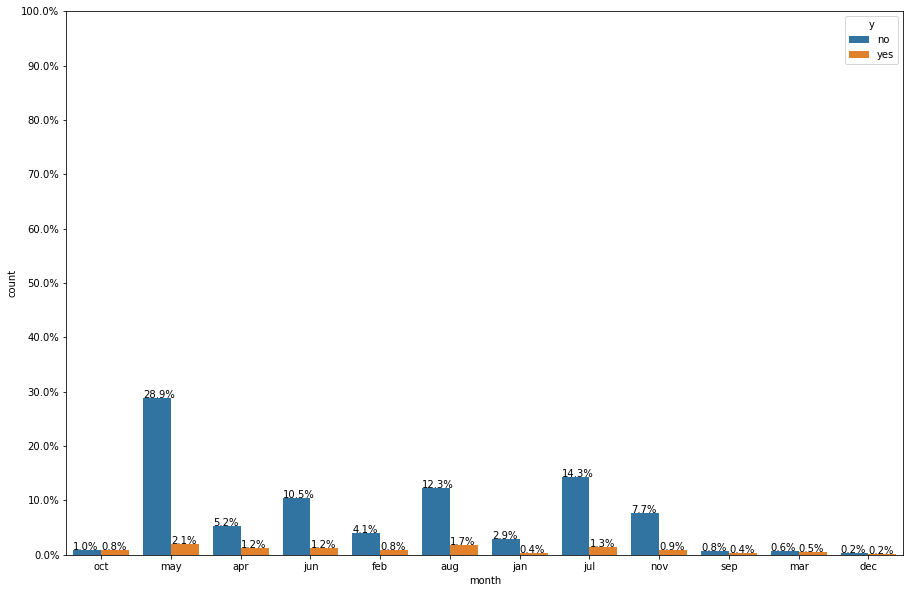

In [256]:
countplot_target_varaible(df2,'month','y')

In [257]:
def bin_month(row):
    if row["month"] in ["oct","sep", "mar", "dec"]:
        return "1"
    elif row["month"] in ["may"]:
        return "2"
    elif row["month"] in ["apr", "feb"]:
        return "3"
    elif row["month"] in ["aug"]:
        return "4"
    elif row["month"] not in ["oct", "may", "apr", "feb", "aug", "sep", "mar", "dec"]:
        return "5"
    else:
        return "Error"

In [258]:
df2['Binned_month'] = df.apply(lambda row: bin_month(row), axis=1)

In [259]:
df2['Binned_month'] = df2['Binned_month'].astype('category')

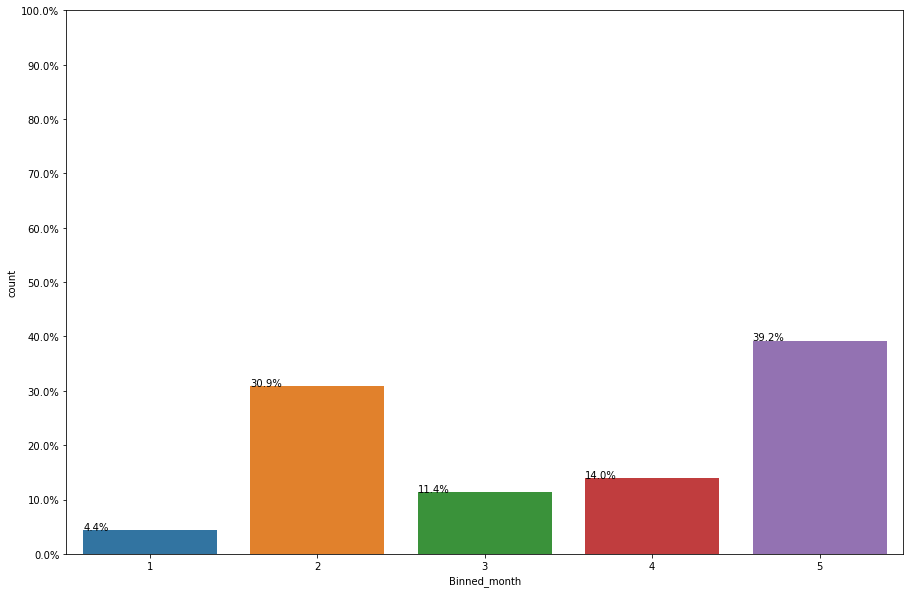

In [260]:
countplot_columns(df2,"Binned_month")

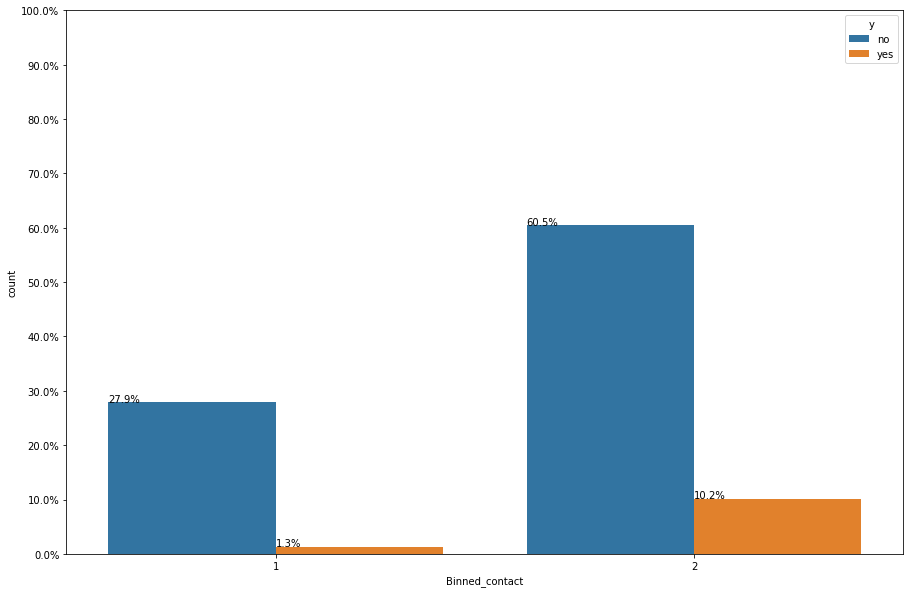

In [261]:
countplot_target_varaible(df2,"Binned_contact","y")

### POUTCOME

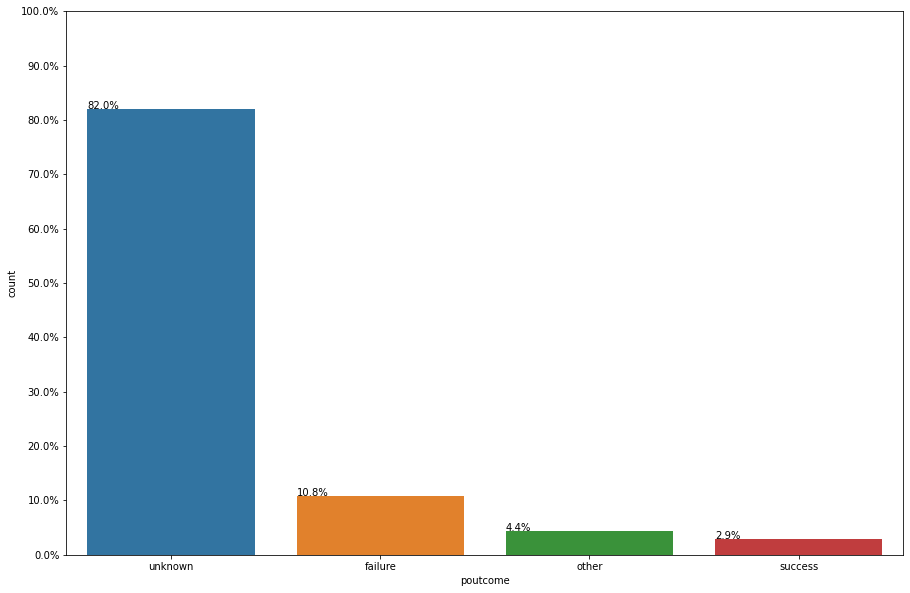

In [262]:
countplot_columns(df2,'poutcome')

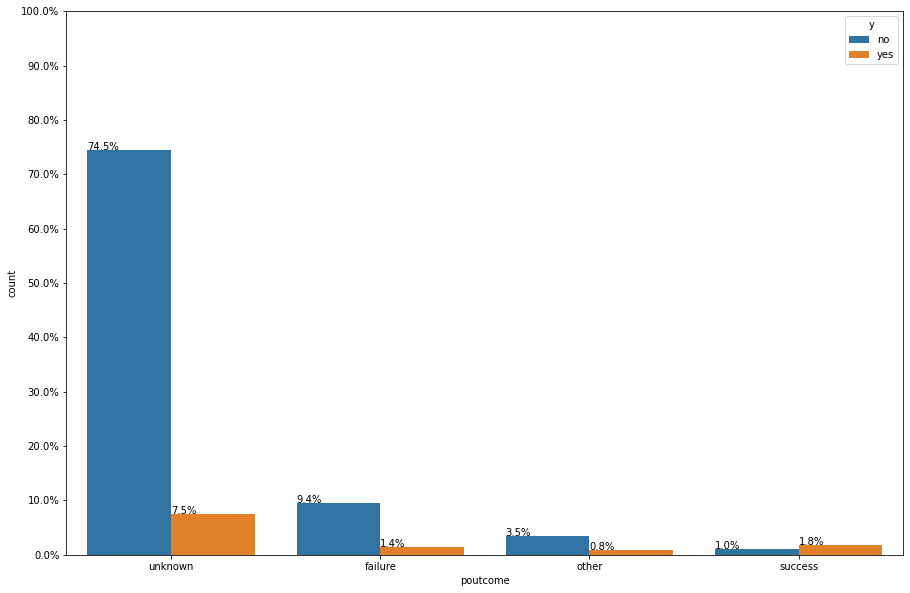

In [263]:
countplot_target_varaible(df2,'poutcome','y')

In [264]:
def bin_poutcome(row):
    if row["poutcome"] not in ["failure","other", "success"]:
        return "1"
    elif row["poutcome"] in ["failure"]:
        return "2"
    elif row["poutcome"] in ["other"]:
        return "3"
    elif row["poutcome"] in ["success"]:
        return "4"
    else:
        return "Error"

In [265]:
df2['Binned_poutcome'] = df.apply(lambda row: bin_poutcome(row), axis=1)

In [266]:
df2['Binned_poutcome'] = df2['Binned_poutcome'].astype('category')

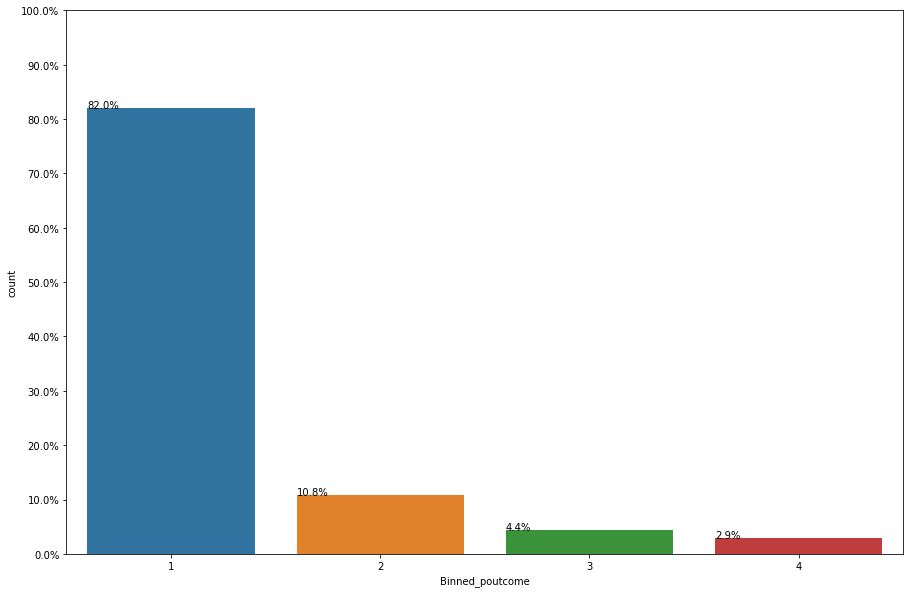

In [267]:
countplot_columns(df2,"Binned_poutcome")

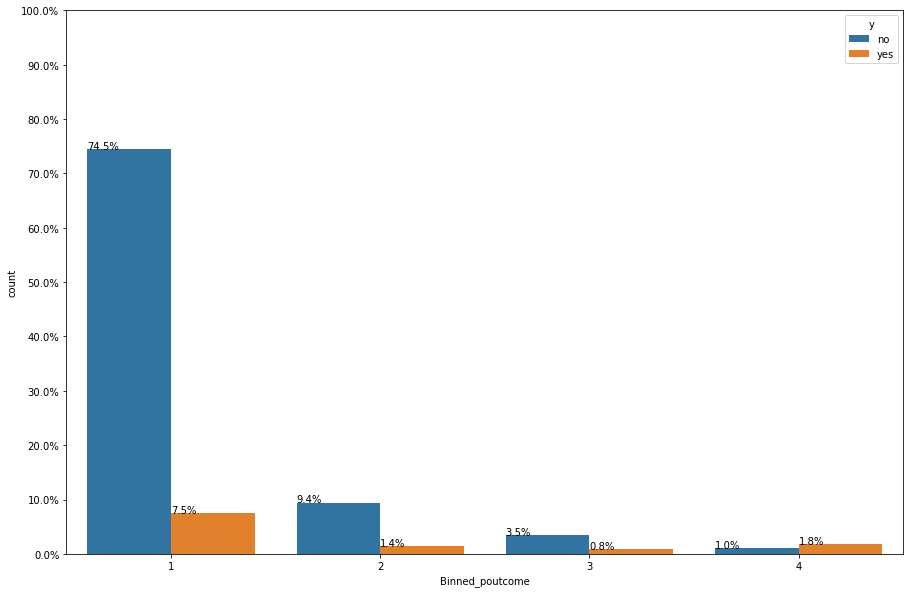

In [268]:
countplot_target_varaible(df2,"Binned_poutcome","y")

In [269]:
#df2["Subscription_probability"]=np.where(df2["Binned_campaign_flag"]=1,"0"))

In [270]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Target', 'Binned_age', 'Binned_balance',
       'Binned_day', 'Binned_campaign_flag', 'Binned_campaign', 'Binned_pdays',
       'Binned_previous', 'Binned_job', 'Binned_marital', 'Binned_education',
       'Binned_housing', 'Binned_loan', 'Binned_contact', 'Binned_month',
       'Binned_poutcome'],
      dtype='object')

# DATA PRE-PROCESSING

In [271]:
feature=df2[['Binned_age', 'Binned_job','Binned_marital', 'Binned_education','Binned_balance',
       'Binned_housing', 'Binned_loan','Binned_contact', 'Binned_pdays', 'Binned_day',"Binned_month"]]

In [272]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Binned_age        4521 non-null   category
 1   Binned_job        4521 non-null   category
 2   Binned_marital    4521 non-null   category
 3   Binned_education  4521 non-null   category
 4   Binned_balance    4521 non-null   category
 5   Binned_housing    4521 non-null   category
 6   Binned_loan       4521 non-null   category
 7   Binned_contact    4521 non-null   category
 8   Binned_pdays      4521 non-null   category
 9   Binned_day        4521 non-null   category
 10  Binned_month      4521 non-null   category
dtypes: category(11)
memory usage: 50.0 KB


In [273]:
target=df2[['Target']]

In [274]:
print("Target variable",target.shape)
print("Features shape",feature.shape)

Target variable (4521, 1)
Features shape (4521, 11)


#### SPLITTING INTO TRAIN, TEST AND CROSS- VALIDATION

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [276]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (3616, 11)
Shape of testing feature: (905, 11)
Shape of training label: (3616, 1)
Shape of training label: (905, 1)


# MODELLING

4 different models with different algorithm. In this step we will create a baseline model for each algorithm using the default parameters set by sklearn and after building all 4 of our models we will compare them to see which works best for our case.

To evaluate our model we will use the confusion matrix as our base for the evaluation.



In [277]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# 1. DECISION TREE

In [278]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [279]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8386740331491712
Precision: 0.27631578947368424
Recall: 0.1875
F1 Score: 0.22340425531914893
Cohens Kappa Score: 0.13705948431254744
Area Under Curve: 0.550221806881643
Confusion Matrix:
 [[738  55]
 [ 91  21]]


# 2. RANDOM FOREST

In [280]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [281]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8552486187845304
Precision: 0.2564102564102564
Recall: 0.08928571428571429
F1 Score: 0.1324503311258278
Cohens Kappa Score: 0.0732025735035452
Area Under Curve: 0.6672615294541524
Confusion Matrix:
 [[764  29]
 [102  10]]


# 3. NAIVE BAYES'

In [282]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [283]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8220994475138121
Precision: 0.24210526315789474
Recall: 0.20535714285714285
F1 Score: 0.2222222222222222
Cohens Kappa Score: 0.1225497576104303
Area Under Curve: 0.6774680237794992
Confusion Matrix:
 [[721  72]
 [ 89  23]]


# 4. K-NEAREST NEIGHBORS

In [284]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [285]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8795580110497238
Precision: 0.5714285714285714
Recall: 0.10714285714285714
F1 Score: 0.18045112781954886
Cohens Kappa Score: 0.14711959951928477
Area Under Curve: 0.6104024049720771
Confusion Matrix:
 [[784   9]
 [100  12]]


# 5. LOGISTIC REGRESSION

In [286]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [287]:
# Evaluate Model
logreg_eval = evaluate_model(logisticRegr, X_test, y_test)

# Print result
print('Accuracy:', logreg_eval['acc'])
print('Precision:', logreg_eval['prec'])
print('Recall:', logreg_eval['rec'])
print('F1 Score:', logreg_eval['f1'])
print('Cohens Kappa Score:', logreg_eval['kappa'])
print('Area Under Curve:', logreg_eval['auc'])
print('Confusion Matrix:\n', logreg_eval['cm'])

Accuracy: 0.876243093922652
Precision: 0.5
Recall: 0.008928571428571428
F1 Score: 0.017543859649122806
Cohens Kappa Score: 0.013259087634586608
Area Under Curve: 0.7219532516663665
Confusion Matrix:
 [[792   1]
 [111   1]]


# MODEL COMPARISON

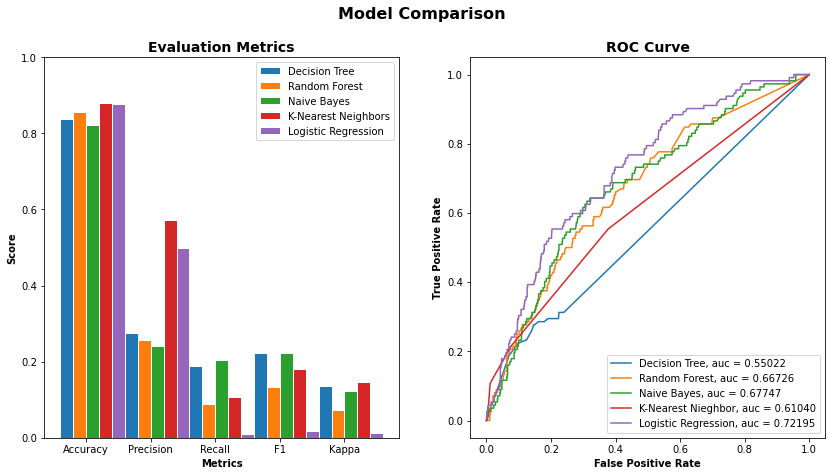

In [288]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
log_score = [logreg_eval['acc'], logreg_eval['prec'], logreg_eval['rec'], logreg_eval['f1'], logreg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, log_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(logreg_eval['fpr'], logreg_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(logreg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()